In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing the sourced data

In [ ]:
i = 2010
datasetlist = []
j = 0
while (i <= 2021):
    if (i <= 2012):
        filestr = str(i) + "matches.xls"
    else:
        filestr = str(i) + "matches.xlsx"
    datasetlist.append(pd.read_excel(filestr))
    j += 1
    i += 1

In [ ]:
all_data = pd.concat(datasetlist, axis=0)

In [ ]:
all_data.shape

In [ ]:
all_data = all_data.sort_values(by=['Date'])
all_data=all_data.reset_index(drop=True)

In [ ]:
all_data

In [ ]:
#making sure that the dataset is temporally ordered
date_list = all_data["Date"].to_list()
assert(date_list == sorted(date_list))

In [ ]:
#total number of matches played
num_matches = all_data.shape[0]

In [889]:
all_data.shape

(30114, 42)

### Cleaning the data - making sure that player names are valid and not duplicated

In [ ]:
players = set()
for i in range(num_matches):
    players.add(all_data.iloc[i].at["Winner"])
    players.add(all_data.iloc[i].at["Loser"])

In [ ]:
player_list = list(players)

In [ ]:
player_list = sorted(player_list)

In [ ]:
player_list

In [890]:
len(player_list)

872

In [ ]:
set_of_last_names = set()
for i in range(len(player_list)):
    set_of_last_names.add(player_list[i].split()[0])

In [ ]:
set_of_last_names

In [ ]:
list_of_last_names = list(set_of_last_names)

In [891]:
len(list_of_last_names)

786

In [ ]:
count = 0
dict1 = {}
for full_name in player_list:
    count = count+1
    last_name = full_name.split()[0]
    if (not (last_name in dict1.keys())):
        dict1[last_name] = [full_name]
    else:
        if (not (full_name in dict1[last_name])):
            dict1[last_name].append(full_name)
print(count)

In [ ]:
dict1

In [ ]:
error_dict = {}
for key in dict1.keys():
    if (len(dict1[key]) > 1):
        error_dict[key] = dict1[key]

In [892]:
error_dict

{'Al': ['Al Ghareeb M.', 'Al Mutawa J.'],
 'Anderson': ['Anderson K.', 'Anderson O.'],
 'Andreev': ['Andreev A.', 'Andreev I.'],
 'Aragone': ['Aragone J.', 'Aragone J.C.', 'Aragone JC'],
 'Baker': ['Baker B.', 'Baker J.'],
 'Barrios': ['Barrios M.', 'Barrios Vera M.T.'],
 'Bautista': ['Bautista Agut R.', 'Bautista R.'],
 'Beck': ['Beck A.', 'Beck K.'],
 'Berrettini': ['Berrettini M.', 'Berrettini M. '],
 'Cerundolo': ['Cerundolo F.', 'Cerundolo J.M.'],
 'Daniel': ['Daniel M.', 'Daniel T.'],
 'Davydenko': ['Davydenko N.', 'Davydenko P.'],
 'De': ['De Bakker T.',
  'De Greef A.',
  'De Heart R.',
  'De Loore J.',
  'De Minaur A.',
  'De Schepper K.',
  'De Voest R.'],
 'Del': ['Del Bonis F.', 'Del Potro J. M.', 'Del Potro J.M.'],
 'Delic': ['Delic A.', 'Delic M.'],
 'Djokovic': ['Djokovic M.', 'Djokovic N.', 'Djokovic N. '],
 'Dolgopolov': ['Dolgopolov A.', 'Dolgopolov O.'],
 'Dutra': ['Dutra Da Silva R.', 'Dutra Silva R.'],
 'El': ['El Amrani R.', 'El Aynaoui Y.'],
 'Evans': ['Evans B.'

In [ ]:
len(error_dict.keys())

In [ ]:
def name_replacer(name):
    l1 = ['Aragone J.', 'Aragone J.C.', 'Aragone JC']
    l2 = ['Barrios M.', 'Barrios Vera M.T.']
    l3 = ['Bautista Agut R.', 'Bautista R.']
    l4 = ['Berrettini M.', 'Berrettini M. ']
    l5 = ['Del Potro J. M.', 'Del Potro J.M.']
    l6 = ['Djokovic N.', 'Djokovic N. ']
    l7 = ['Dolgopolov A.', 'Dolgopolov O.']
    l8 = ['Dutra Da Silva R.', 'Dutra Silva R.']
    l9 = ['Federer R.', 'Federer R. ']
    l10 = ['Galan D.', 'Galan D.E.']
    l11 = ['Granollers G.','Granollers Pujol G.']
    l12 = ['Herbert P.H', 'Herbert P.H.']
    l13 = ['Hernandez-Fernandez J', 'Hernandez-Fernandez J.']
    l14 = ['Kuznetsov A.', 'Kuznetsov Al.']
    l15 = ['Lu Y.', 'Lu Y.H.']
    l16 = ['Medvedev D.', 'Medvedev D. ']
    l17 = ['Nadal R.', 'Nadal R. ']
    l18 = ['Nedovyesov A.', 'Nedovyesov O.']
    l19 = ['Silva F.', 'Silva F.F.']
    l20 = ['Stebe C-M.', 'Stebe C.M.']
    l21 = ['Thiem D.', 'Thiem D. ']
    l22 = ['Tsitsipas S.', 'Tsitsipas S. ']
    l23 = ['Van D. Merwe I.','Van Der Merwe I.',]
    l24 = ['Varillas J. P.', 'Varillas J.P.']
    l25 = ['Zayid M.', 'Zayid M. S.', 'Zayid M.S.']
    l26 = ['Zhang Z.', 'Zhang Ze', 'Zhang Ze.']
    l27 = ['Zverev A.', 'Zverev A. ']
    complete_list = [l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27]
    for sublist in complete_list:
        if name in sublist:
            return sublist[0]
    return name
    

In [ ]:
for i in range(num_matches):
    all_data.at[i,'Winner'] = name_replacer(all_data.at[i,'Winner'])
    all_data.at[i,'Loser'] = name_replacer(all_data.at[i,'Loser'])

In [ ]:
all_data.columns

## Preparing the target feature

In [ ]:
np.random.seed(42)
target = np.random.random(size=num_matches)
for i in range(target.size):
    if (target[i] < 0.5):
        target[i] = 0
    else:
        target[i] = 1

# Feature Extraction

#### atp_rank_diff

In [ ]:
atp_rank_diff = np.zeros(num_matches)
for i in range(num_matches):
    
    # Player 1 is the winner
    if (target[i] == 1):
        atp_rank_diff[i] = all_data.at[i,"WRank"] - all_data.at[i,"LRank"]
        
    # Player 2 is the winner
    else:
        atp_rank_diff[i] = all_data.at[i,"LRank"] - all_data.at[i,"WRank"]

In [ ]:
atp_rank_diff[np.isnan(atp_rank_diff)] = 0
np.isnan(atp_rank_diff).sum()
atp_rank_diff = atp_rank_diff.reshape(num_matches,1)

In [1373]:
atp_rank_diff[100]

array([57.])

In [1375]:
all_data.loc[100]

ATP                             4
Location                 Auckland
Tournament          Heineken Open
Date          2010-01-11 00:00:00
Series                     ATP250
Court                     Outdoor
Surface                      Hard
Round                   1st Round
Best of                         3
Winner                  Lammer M.
Loser                    Evans D.
WRank                       209.0
LRank                       266.0
WPts                        223.0
LPts                        167.0
W1                            1.0
L1                            6.0
W2                            6.0
L2                            2.0
W3                            6.0
L3                            4.0
W4                            NaN
L4                            NaN
W5                            NaN
L5                            NaN
Wsets                         2.0
Lsets                         1.0
Comment                 Completed
B365W                        1.57
B365L         

#### atp_points_diff

In [ ]:
atp_points_diff = np.zeros(num_matches)
for i in range(num_matches):
    
    # Player 1 is the winner
    if (target[i] == 1):
        atp_points_diff[i] = all_data.at[i,"WPts"] - all_data.at[i,"LPts"]
        
    # Player 2 is the winner
    else:
        atp_points_diff[i] = all_data.at[i,"LPts"] - all_data.at[i,"WPts"]
atp_points_diff[np.isnan(atp_points_diff)] = 0
np.isnan(atp_points_diff).sum()
atp_points_diff = atp_points_diff.reshape(num_matches,1)

## Note: player dictionary that will be useful for future computations

In [352]:
player_to_matches_dict = {}
for i in range(num_matches):
    winner_name = all_data.at[i,"Winner"]
    loser_name = all_data.at[i,"Loser"]
    if (not (winner_name in player_to_matches_dict.keys())):
        player_to_matches_dict[winner_name] = [i]
    else:
        player_to_matches_dict[winner_name].append(i)
        
    if (not (loser_name in player_to_matches_dict.keys())):
        player_to_matches_dict[loser_name] = [i]
    else:
        player_to_matches_dict[loser_name].append(i)

#### Head to head 
#### h2h_perc, h2h_net

In [476]:
h2h_perc = np.zeros(num_matches)
h2h_net = np.zeros(num_matches)

for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins = 0
    num_player_2_wins = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
        
    for j in common_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)) and ((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (player_1_name == past_match_winner_name):
            num_player_1_wins = num_player_1_wins + 1
        else:
            num_player_2_wins = num_player_2_wins + 1
                
    if (num_player_1_wins + num_player_2_wins > 0):
        h2h_net[i] = num_player_1_wins - num_player_2_wins
        player_1_win_perc = num_player_1_wins/(num_player_1_wins + num_player_2_wins)
        player_2_win_perc = num_player_2_wins/(num_player_1_wins + num_player_2_wins)
        h2h_perc[i] = player_1_win_perc - player_2_win_perc

In [477]:
h2h_perc = h2h_perc.reshape(num_matches,1)
h2h_net = h2h_net.reshape(num_matches,1)

#### all_matches_perc, all_matches_net

In [ ]:
all_matches_perc = np.zeros(num_matches)
all_matches_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        num_player_1_all_games += 1
        if (player_1_name == past_match_winner_name):
            num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        num_player_2_all_games += 1
        if (player_2_name == past_match_winner_name):
            num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        all_matches_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        all_matches_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [ ]:
all_matches_perc = all_matches_perc.reshape(num_matches,1)
all_matches_net = all_matches_net.reshape(num_matches,1)

#### same_surface_perc, same_surface_net

In [ ]:
same_surface_perc = np.zeros(num_matches)
same_surface_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    match_surface = all_data.at[i,"Surface"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_surface = all_data.at[j,"Surface"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (past_match_surface == match_surface):
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_surface = all_data.at[j,"Surface"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (past_match_surface == match_surface):
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        same_surface_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        same_surface_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [ ]:
same_surface_perc = same_surface_perc.reshape(num_matches,1)
same_surface_net = same_surface_net.reshape(num_matches,1)

#### same_tournament_perc, same_tournament_net

In [ ]:
same_tournament_perc = np.zeros(num_matches)
same_tournament_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    match_tournament = all_data.at[i,"Tournament"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_tournament = all_data.at[j,"Tournament"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (past_match_tournament == match_tournament):
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_tournament = all_data.at[j,"Tournament"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (past_match_tournament == match_tournament):
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        same_tournament_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        same_tournament_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [ ]:
same_tournament_perc = same_tournament_perc.reshape(num_matches,1)
same_tournament_net = same_tournament_net.reshape(num_matches,1)

#### best_of_perc, best_of_net

In [ ]:
best_of_perc = np.zeros(num_matches)
best_of_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    match_tournament = all_data.at[i,"Best of"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_tournament = all_data.at[j,"Best of"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (past_match_tournament == match_tournament):
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_tournament = all_data.at[j,"Best of"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (past_match_tournament == match_tournament):
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        best_of_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        best_of_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [ ]:
best_of_perc = best_of_perc.reshape(num_matches,1)
best_of_net = best_of_net.reshape(num_matches,1)

#### set_perc

In [ ]:
set_perc = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_sets = 0
    num_player_1_all_sets = 0
    num_player_2_wins_all_sets = 0
    num_player_2_all_sets = 0

    player_1_all_sets_win_percentage = 0
    player_2_all_sets_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        num_player_1_all_sets += (all_data.at[j,"Wsets"] + all_data.at[j,"Lsets"])
        if (player_1_name == past_match_winner_name):
            num_player_1_wins_all_sets += (all_data.at[j,"Wsets"])
            
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        num_player_2_all_sets += (all_data.at[j,"Wsets"] + all_data.at[j,"Lsets"])
        if (player_2_name == past_match_winner_name):
            num_player_2_wins_all_sets += (all_data.at[j,"Wsets"])
        
                
    if (num_player_2_all_sets > 0 and num_player_1_all_sets > 0):
        player_1_all_sets_win_percentage = num_player_1_wins_all_sets / num_player_1_all_sets
        player_2_all_sets_win_percentage = num_player_2_wins_all_sets / num_player_2_all_sets
        set_perc[i] = player_1_all_sets_win_percentage - player_2_all_sets_win_percentage


In [ ]:
set_perc = set_perc.reshape(num_matches,1)

#### win_streak, loss_streak

In [ ]:
win_streak = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_wins_1 = 0
    num_wins_2 = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    if (player_1_relevant_matches[0] != i):
        last_match_index = find_lt(player_1_relevant_matches,i)
        while (last_match_index >= 0):
            if (all_data.at[player_1_relevant_matches[last_match_index],"Winner"] == player_1_name):
                num_wins_1 += 1
            else:
                break
            last_match_index = last_match_index-1
            
    if (player_2_relevant_matches[0] != i):
        last_match_index = find_lt(player_2_relevant_matches,i)
        while (last_match_index >= 0):
            if (all_data.at[player_2_relevant_matches[last_match_index],"Winner"] == player_2_name):
                num_wins_2 += 1
            else:
                break
            last_match_index = last_match_index-1
    
    win_streak[i] = num_wins_1 - num_wins_2

In [ ]:
win_streak = win_streak.reshape(num_matches,1)

In [ ]:
from bisect import bisect_left
def find_lt(a, x):
    'Find rightmost value less than x'
    i = bisect_left(a, x)
    if i:
        return (i-1)
    raise ValueError

In [ ]:
loss_streak = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_loss_1 = 0
    num_loss_2 = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    if (player_1_relevant_matches[0] != i):
        last_match_index = find_lt(player_1_relevant_matches,i)
        while (last_match_index >= 0):
            if (all_data.at[player_1_relevant_matches[last_match_index],"Loser"] == player_1_name):
                num_loss_1 += 1
            else:
                break
            last_match_index = last_match_index-1
            
    if (player_2_relevant_matches[0] != i):
        last_match_index = find_lt(player_2_relevant_matches,i)
        while (last_match_index >= 0):
            if (all_data.at[player_2_relevant_matches[last_match_index],"Loser"] == player_2_name):
                num_loss_2 += 1
            else:
                break
            last_match_index = last_match_index-1
    
    loss_streak[i] = num_loss_1 - num_loss_2

In [ ]:
loss_streak = loss_streak.reshape(num_matches,1)

#### perfect_set_perc, perfect_set_net

In [ ]:
perfect_set_perc = np.zeros(num_matches)
perfect_set_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_sets = 0
    num_player_1_all_sets = 0
    num_player_2_wins_all_sets = 0
    num_player_2_all_sets = 0

    player_1_all_sets_win_percentage = 0
    player_2_all_sets_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        num_player_1_all_sets += 1
        if ((player_1_name == past_match_winner_name) and (all_data.at[j,"Lsets"] == 0)):
            num_player_1_wins_all_sets += 1
            
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        num_player_2_all_sets += 1
        if ((player_2_name == past_match_winner_name) and (all_data.at[j,"Lsets"] == 0)):
            num_player_2_wins_all_sets += 1
        
                
    if (num_player_2_all_sets > 0 and num_player_1_all_sets > 0):
        player_1_all_sets_win_percentage = num_player_1_wins_all_sets / num_player_1_all_sets
        player_2_all_sets_win_percentage = num_player_2_wins_all_sets / num_player_2_all_sets
        perfect_set_perc[i] = player_1_all_sets_win_percentage - player_2_all_sets_win_percentage
        perfect_set_net[i] = num_player_1_wins_all_sets - num_player_2_wins_all_sets

In [ ]:
perfect_set_perc = perfect_set_perc.reshape(num_matches,1)
perfect_set_net = perfect_set_net.reshape(num_matches,1)

#### tiredness

In [294]:
def calc_num_games(row):
    w1 = all_data.at[row,"W1"]
    l1 = all_data.at[row,"L1"]
    w2 = all_data.at[row,"W2"]
    L2 = all_data.at[row,"L2"]
    w3 = all_data.at[row,"W3"]
    l3 = all_data.at[row,"L3"]
    w4 = all_data.at[row,"W4"]
    l4 = all_data.at[row,"L4"]
    w5 = all_data.at[row,"W5"]
    l5 = all_data.at[row,"L5"]
    if (np.isnan(w1)):
        w1 = 0
    if (np.isnan(w2)):
        w2 = 0
    if (np.isnan(w3)):
        w3 = 0
    if (np.isnan(w4)):
        w4 = 0
    if (np.isnan(w5)):
        w5 = 0
    if (np.isnan(l1)):
        l1 = 0
    if (np.isnan(L2)):
        L2 = 0
    if (np.isnan(l3)):
        l3 = 0
    if (np.isnan(l4)):
        l4 = 0
    if (np.isnan(l5)):
        l5 = 0
    return w1+w2+w3+w4+w5+l1+L2+l3+l4+l5
    
    

In [495]:
def calc_num_games_winner(row):
    w1 = all_data.at[row,"W1"]
    w2 = all_data.at[row,"W2"]
    w3 = all_data.at[row,"W3"]
    w4 = all_data.at[row,"W4"]
    w5 = all_data.at[row,"W5"]
    if (np.isnan(w1)):
        w1 = 0
    if (np.isnan(w2)):
        w2 = 0
    if (np.isnan(w3)):
        w3 = 0
    if (np.isnan(w4)):
        w4 = 0
    if (np.isnan(w5)):
        w5 = 0
    return w1+w2+w3+w4+w5
    
    

In [290]:
w = np.NaN
np.isnan(w)

True

In [307]:
tiredness = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    tiredness_1 = 0
    tiredness_2 = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    match_timestamp = all_data.at[i, "Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        if (days <= 5):
            num_games = calc_num_games(j)
            tiredness_1 += (num_games*(0.75**days))
    
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        if (days <= 5):
            num_games = calc_num_games(j)
            tiredness_2 += (num_games*(0.75**days))
    
    
    tiredness[i] = tiredness_1 - tiredness_2

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [308]:
tiredness = tiredness.reshape(num_matches,1)

#### all_matches_last_year_perc, all_matches_last_year_net

In [ ]:
all_matches_last_year_perc = np.zeros(num_matches)
all_matches_last_year_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    match_timestamp = all_data.at[i, "Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        current_match_timestamp =  match_timestamp = all_data.at[j, "Date"]
        days = (match_timestamp - current_match_timestamp).days
        if (days <= 365):  
            past_match_winner_name = all_data.at[j,"Winner"]
            past_match_loser_name = all_data.at[j,"Loser"]
            assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        current_match_timestamp =  match_timestamp = all_data.at[j, "Date"]
        days = (match_timestamp - current_match_timestamp).days
        if (days <= 365):
            past_match_winner_name = all_data.at[j,"Winner"]
            past_match_loser_name = all_data.at[j,"Loser"]
            assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        all_matches_last_year_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        all_matches_last_year_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [310]:
all_matches_last_year_perc = all_matches_last_year_perc.reshape(num_matches,1)
all_matches_last_year_net = all_matches_last_year_net.reshape(num_matches,1)

#### time_since_last_game

In [ ]:
time_since_last_game = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    time_1 = 0
    time_2 = 0
    
    match_date = all_data.at[i,"Date"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    if (player_1_relevant_matches[0] != i):
        last_match_index = find_lt(player_1_relevant_matches,i)
        past_match_date = all_data.at[player_1_relevant_matches[last_match_index],"Date"]
        time_1 = (match_date - past_match_date).days
            
    if (player_2_relevant_matches[0] != i):
        last_match_index = find_lt(player_2_relevant_matches,i)
        past_match_date = all_data.at[player_2_relevant_matches[last_match_index],"Date"]
        time_2 = (match_date - past_match_date).days
    
    time_since_last_game[i] = time_1 - time_2

In [319]:
time_since_last_game = time_since_last_game.reshape(num_matches,1)

#### injured

In [ ]:
injured = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    case_1 = 0
    case_2 = 0
    
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    if (player_1_relevant_matches[0] != i):
        last_match_index = find_lt(player_1_relevant_matches,i)
        past_match_case = all_data.at[player_1_relevant_matches[last_match_index],"Comment"]
        if ((past_match_case != "Completed") and (all_data.at[player_1_relevant_matches[last_match_index],"Loser"] == player_1_name)):
            case_1 = 1
            
    if (player_2_relevant_matches[0] != i):
        last_match_index = find_lt(player_2_relevant_matches,i)
        past_match_case = all_data.at[player_2_relevant_matches[last_match_index],"Comment"]
        if ((past_match_case != "Completed") and (all_data.at[player_2_relevant_matches[last_match_index],"Loser"] == player_2_name)):
            case_2 = 1
    
    injured[i] = case_1 - case_2

In [329]:
injured = injured.reshape(num_matches,1)

#### perfect_set_last_year_perc, perfect_set_last_year_net

In [340]:
perfect_set_last_year_perc = np.zeros(num_matches)
perfect_set_last_year_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_sets = 0
    num_player_1_all_sets = 0
    num_player_2_wins_all_sets = 0
    num_player_2_all_sets = 0

    player_1_all_sets_win_percentage = 0
    player_2_all_sets_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    match_date = all_data.at[i,"Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_date = all_data.at[j,"Date"]
        if ((match_date-past_match_date).days <= 365): 
            assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
            num_player_1_all_sets += 1
            if ((player_1_name == past_match_winner_name) and (all_data.at[j,"Lsets"] == 0)):
                num_player_1_wins_all_sets += 1
            
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_date = all_data.at[j,"Date"]
        if ((match_date-past_match_date).days <= 365): 
            assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
            num_player_2_all_sets += 1
            if ((player_2_name == past_match_winner_name) and (all_data.at[j,"Lsets"] == 0)):
                num_player_2_wins_all_sets += 1
        
                
    if (num_player_2_all_sets > 0 and num_player_1_all_sets > 0):
        player_1_all_sets_win_percentage = num_player_1_wins_all_sets / num_player_1_all_sets
        player_2_all_sets_win_percentage = num_player_2_wins_all_sets / num_player_2_all_sets
        perfect_set_last_year_perc[i] = player_1_all_sets_win_percentage - player_2_all_sets_win_percentage
        perfect_set_last_year_net[i] = num_player_1_wins_all_sets - num_player_2_wins_all_sets

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [341]:
perfect_set_last_year_perc = perfect_set_last_year_perc.reshape(num_matches,1)
perfect_set_last_year_net = perfect_set_last_year_net.reshape(num_matches,1)

### setting up opponent dict

In [353]:
player_to_opponents_dict = {}
for i in range(num_matches):
    winner_name = all_data.at[i,"Winner"]
    loser_name = all_data.at[i,"Loser"]
    if (not (winner_name in player_to_opponents_dict.keys())):
        player_to_opponents_dict[winner_name] = [all_data.at[i,"Loser"]]
    else:
        player_to_opponents_dict[winner_name].append(all_data.at[i,"Loser"])
        
    if (not (loser_name in player_to_opponents_dict.keys())):
        player_to_opponents_dict[loser_name] = [all_data.at[i,"Winner"]]
    else:
        player_to_opponents_dict[loser_name].append(all_data.at[i,"Winner"])

#### opp_all_matches_perc, opp_all_matches_net

In [ ]:
opp_all_matches_perc = np.zeros(num_matches)
opp_all_matches_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    player_1_opponents = player_to_opponents_dict[player_1_name]
    player_2_opponents = player_to_opponents_dict[player_2_name]
    common_opponents_set = (set(player_1_opponents) & set(player_2_opponents))
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (((past_match_winner_name in common_opponents_set) or (past_match_loser_name in common_opponents_set))):
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (((past_match_winner_name in common_opponents_set) or (past_match_loser_name in common_opponents_set))):
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        opp_all_matches_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        opp_all_matches_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [361]:
opp_all_matches_perc = opp_all_matches_perc.reshape(num_matches,1)
opp_all_matches_net = opp_all_matches_net.reshape(num_matches,1)

#### weighted_all_matches_perc, weighted_all_matches_net

In [441]:
import math

In [ ]:
weighted_all_matches_perc = np.zeros(num_matches)
weighted_all_matches_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0

    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    match_timestamp = all_data.at[i,"Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(days >= 0)
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        num_player_1_all_games += (math.exp((-0.0005)*days))
        if (player_1_name == past_match_winner_name):
            num_player_1_wins_all_games += (math.exp((-0.0005)*days))
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(days >= 0)
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        num_player_2_all_games += (math.exp((-0.0005)*days))
        if (player_2_name == past_match_winner_name):
            num_player_2_wins_all_games += (math.exp((-0.0005)*days))
        
                
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        weighted_all_matches_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        weighted_all_matches_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games


In [443]:
weighted_all_matches_perc = weighted_all_matches_perc.reshape(num_matches,1)
weighted_all_matches_net = weighted_all_matches_net.reshape(num_matches,1)

#### weighted_same_surface_perc, weighted_same_surface_net

In [451]:
weighted_same_surface_perc = np.zeros(num_matches)
weighted_same_surface_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    match_surface = all_data.at[i,"Surface"]
    match_timestamp = all_data.at[i,"Date"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_surface = all_data.at[j,"Surface"]
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (past_match_surface == match_surface):
            num_player_1_all_games += (math.exp((-0.0005)*days))
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += (math.exp((-0.0005)*days))
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_surface = all_data.at[j,"Surface"]
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (past_match_surface == match_surface):
            num_player_2_all_games += (math.exp((-0.0005)*days))
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += (math.exp((-0.0005)*days))
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        weighted_same_surface_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        weighted_same_surface_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [452]:
weighted_same_surface_perc = weighted_same_surface_perc.reshape(num_matches,1)
weighted_same_surface_net = weighted_same_surface_net.reshape(num_matches,1)

#### weighted_h2h_perc, weighted_h2h_net

In [478]:
weighted_h2h_perc = np.zeros(num_matches)
weighted_h2h_net = np.zeros(num_matches)

for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins = 0
    num_player_2_wins = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
    match_timestamp = all_data.at[i,"Date"]
        
    for j in common_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)) and ((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (player_1_name == past_match_winner_name):
            num_player_1_wins = num_player_1_wins + (math.exp((-0.0005)*days))
        else:
            num_player_2_wins = num_player_2_wins + (math.exp((-0.0005)*days))
                
    if (num_player_1_wins + num_player_2_wins > 0):
        h2h_net[i] = num_player_1_wins - num_player_2_wins
        player_1_win_perc = num_player_1_wins/(num_player_1_wins + num_player_2_wins)
        player_2_win_perc = num_player_2_wins/(num_player_1_wins + num_player_2_wins)
        weighted_h2h_perc[i] = player_1_win_perc - player_2_win_perc

In [ ]:
weighted_h2h_perc = np.zeros(num_matches)
weighted_h2h_net = np.zeros(num_matches)

for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins = 0
    num_player_2_wins = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
    match_timestamp = all_data.at[i,"Date"]
        
    for j in common_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)) and ((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (player_1_name == past_match_winner_name):
            num_player_1_wins = num_player_1_wins + (math.exp((-0.0005)*days))
        else:
            num_player_2_wins = num_player_2_wins + (math.exp((-0.0005)*days))
                
    if (num_player_1_wins + num_player_2_wins > 0):
        h2h_net[i] = num_player_1_wins - num_player_2_wins
        player_1_win_perc = num_player_1_wins/(num_player_1_wins + num_player_2_wins)
        player_2_win_perc = num_player_2_wins/(num_player_1_wins + num_player_2_wins)
        weighted_h2h_perc[i] = player_1_win_perc - player_2_win_perc

In [479]:
weighted_h2h_perc = weighted_h2h_perc.reshape(num_matches,1)
weighted_h2h_net = weighted_h2h_net.reshape(num_matches,1)

#### weighted_op_all_matches_perc, weighted_op_all_matches_net

In [485]:
weighted_opp_all_matches_perc = np.zeros(num_matches)
weighted_opp_all_matches_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    player_1_opponents = player_to_opponents_dict[player_1_name]
    player_2_opponents = player_to_opponents_dict[player_2_name]
    common_opponents_set = (set(player_1_opponents) & set(player_2_opponents))
    match_timestamp = all_data.at[i,"Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (((past_match_winner_name in common_opponents_set) or (past_match_loser_name in common_opponents_set))):
            num_player_1_all_games += (math.exp((-0.0005)*days))
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += (math.exp((-0.0005)*days))
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (((past_match_winner_name in common_opponents_set) or (past_match_loser_name in common_opponents_set))):
            num_player_2_all_games += (math.exp((-0.0005)*days))
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += (math.exp((-0.0005)*days))
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        weighted_opp_all_matches_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        weighted_opp_all_matches_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [486]:
weighted_opp_all_matches_perc = weighted_opp_all_matches_perc.reshape(num_matches,1)
weighted_opp_all_matches_net = weighted_opp_all_matches_net.reshape(num_matches,1)

#### surface_opp_all_matches_perc, surface_opp_all_matches_net

In [489]:
surface_opp_all_matches_perc = np.zeros(num_matches)
surface_opp_all_matches_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    player_1_opponents = player_to_opponents_dict[player_1_name]
    player_2_opponents = player_to_opponents_dict[player_2_name]
    common_opponents_set = (set(player_1_opponents) & set(player_2_opponents))
    match_surface = all_data.at[i,"Surface"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_surface = all_data.at[j,"Surface"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (((past_match_winner_name in common_opponents_set) or (past_match_loser_name in common_opponents_set))):
            if (match_surface == past_match_surface):
                num_player_1_all_games += 1
                if (player_1_name == past_match_winner_name):
                    num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_surface = all_data.at[j,"Surface"]
        days = (match_timestamp-past_match_timestamp).days
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (((past_match_winner_name in common_opponents_set) or (past_match_loser_name in common_opponents_set))):
            if (match_surface == past_match_surface):
                num_player_2_all_games += 1
                if (player_2_name == past_match_winner_name):
                    num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        surface_opp_all_matches_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        surface_opp_all_matches_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [491]:
surface_opp_all_matches_perc = weighted_opp_all_matches_perc.reshape(num_matches,1)
surface_opp_all_matches_net = weighted_opp_all_matches_net.reshape(num_matches,1)

#### weighted_games_perc, weighted_games_net

In [496]:
weighted_games_perc = np.zeros(num_matches)
weighted_games_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0

    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    match_timestamp = all_data.at[i,"Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(days >= 0)
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        num_player_1_all_games += calc_num_games(j)*(math.exp((-0.0005)*days))
        if (player_1_name == past_match_winner_name):
            num_player_1_wins_all_games += calc_num_games_winner(j)*(math.exp((-0.0005)*days))
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(days >= 0)
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        num_player_2_all_games += calc_num_games(j)*(math.exp((-0.0005)*days))
        if (player_2_name == past_match_winner_name):
            num_player_2_wins_all_games += calc_num_games_winner(j)*(math.exp((-0.0005)*days))
        
                
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        weighted_games_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        weighted_games_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [497]:
weighted_games_perc = weighted_games_perc.reshape(num_matches,1)
weighted_games_net = weighted_games_net.reshape(num_matches,1)

#### h2h_last_time

In [557]:
h2h_last_time = np.zeros(num_matches)

for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins = 0
    num_player_2_wins = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
    
    if (common_matches[0]!=i):
        last_match_index = find_lt(common_matches,i)
        past_match_winner_name = all_data.at[common_matches[last_match_index],"Winner"]
        past_match_loser_name = all_data.at[common_matches[last_match_index],"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)) and ((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (player_1_name == past_match_winner_name):
            h2h_last_time[i] = 1
        else:
            h2h_last_time[i] = 0

In [560]:
h2h_last_time = h2h_last_time.reshape(num_matches,1)

#### same_round_perc, same_round_net

In [ ]:
same_round_perc = np.zeros(num_matches)
same_round_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    match_round = all_data.at[i,"Round"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_round = all_data.at[j,"Round"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (past_match_round == match_round):
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_round = all_data.at[j,"Round"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (past_match_round == match_round):
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        same_round_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        same_round_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [596]:
same_round_perc = same_round_perc.reshape(num_matches,1)
same_round_net = same_round_net.reshape(num_matches,1)

#### same_series_perc, same_series_net

In [ ]:
same_series_perc = np.zeros(num_matches)
same_series_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    match_series = all_data.at[i,"Series"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_series = all_data.at[j,"Series"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (past_match_series == match_series):
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        past_match_series = all_data.at[j,"Series"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (past_match_series == match_series):
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        same_series_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        same_series_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [598]:
same_series_perc = same_series_perc.reshape(num_matches,1)
same_series_net = same_series_net.reshape(num_matches,1)

#### zero_set_perc, zero_set_net

In [700]:
zero_set_perc = np.zeros(num_matches)
zero_set_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_sets = 0
    num_player_1_all_sets = 0
    num_player_2_wins_all_sets = 0
    num_player_2_all_sets = 0

    player_1_all_sets_win_percentage = 0
    player_2_all_sets_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        num_player_1_all_sets += 1
        if ((player_1_name == past_match_loser_name) and (all_data.at[j,"Lsets"] == 0)):
            num_player_1_wins_all_sets += 1
            
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        num_player_2_all_sets += 1
        if ((player_2_name == past_match_loser_name) and (all_data.at[j,"Lsets"] == 0)):
            num_player_2_wins_all_sets += 1
        
                
    if (num_player_2_all_sets > 0 and num_player_1_all_sets > 0):
        player_1_all_sets_win_percentage = num_player_1_wins_all_sets / num_player_1_all_sets
        player_2_all_sets_win_percentage = num_player_2_wins_all_sets / num_player_2_all_sets
        zero_set_perc[i] = player_1_all_sets_win_percentage - player_2_all_sets_win_percentage
        zero_set_net[i] = num_player_1_wins_all_sets - num_player_2_wins_all_sets

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [702]:
zero_set_perc = zero_set_perc.reshape(num_matches,1)
zero_set_net = zero_set_net.reshape(num_matches,1)

In [762]:
all_matches_last_three_months_perc = np.zeros(num_matches)
all_matches_last_three_months_net = np.zeros(num_matches)

In [ ]:
all_matches_last_three_months_perc = np.zeros(num_matches)
all_matches_last_three_months_net = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins_all_games = 0
    num_player_1_all_games = 0
    num_player_2_wins_all_games = 0
    num_player_2_all_games = 0
    player_1_all_games_win_percentage = 0
    player_2_all_games_win_percentage = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    match_timestamp = all_data.at[i, "Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        current_match_timestamp =  match_timestamp = all_data.at[j, "Date"]
        days = (match_timestamp - current_match_timestamp).days
        if (days <= 100):  
            past_match_winner_name = all_data.at[j,"Winner"]
            past_match_loser_name = all_data.at[j,"Loser"]
            assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
            num_player_1_all_games += 1
            if (player_1_name == past_match_winner_name):
                num_player_1_wins_all_games += 1
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        current_match_timestamp =  match_timestamp = all_data.at[j, "Date"]
        days = (match_timestamp - current_match_timestamp).days
        if (days <= 100):
            past_match_winner_name = all_data.at[j,"Winner"]
            past_match_loser_name = all_data.at[j,"Loser"]
            assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
            num_player_2_all_games += 1
            if (player_2_name == past_match_winner_name):
                num_player_2_wins_all_games += 1
        
    if (num_player_2_all_games > 0 and num_player_1_all_games > 0):
        player_1_all_games_win_percentage = num_player_1_wins_all_games / num_player_1_all_games
        player_2_all_games_win_percentage = num_player_2_wins_all_games / num_player_2_all_games
        all_matches_last_three_months_perc[i] = player_1_all_games_win_percentage - player_2_all_games_win_percentage
        all_matches_last_three_months_net[i] = num_player_1_wins_all_games - num_player_2_wins_all_games

In [764]:
all_matches_last_three_months_perc = all_matches_last_three_months_perc.reshape(num_matches,1)
all_matches_last_three_months_net = all_matches_last_three_months_net.reshape(num_matches,1)

#### h2h_same_surface_perc, h2h_same_surface_net

In [829]:
h2h_same_surface_perc = np.zeros(num_matches)
h2h_same_surface_net = np.zeros(num_matches)

for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins = 0
    num_player_2_wins = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
        
    for j in common_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        if (all_data.at[i,"Surface"] == all_data.at[j,"Surface"]):
            assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)) and ((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
            if (player_1_name == past_match_winner_name):
                num_player_1_wins = num_player_1_wins + 1
            else:
                num_player_2_wins = num_player_2_wins + 1
                
    if (num_player_1_wins + num_player_2_wins > 0):
        h2h_same_surface_net[i] = num_player_1_wins - num_player_2_wins
        player_1_win_perc = num_player_1_wins/(num_player_1_wins + num_player_2_wins)
        player_2_win_perc = num_player_2_wins/(num_player_1_wins + num_player_2_wins)
        h2h_same_surface_perc[i] = player_1_win_perc - player_2_win_perc

In [830]:
h2h_same_surface_perc = h2h_same_surface_perc.reshape(num_matches,1)
h2h_same_surface_net = h2h_same_surface_net.reshape(num_matches,1)

#### h2h_same_tournament_perc, h2h_same_tournament_net

In [835]:
h2h_same_tournament_perc = np.zeros(num_matches)
h2h_same_tournament_net = np.zeros(num_matches)

for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    num_player_1_wins = 0
    num_player_2_wins = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
        
    for j in common_matches:
        if (j >= i):
            break
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        if (all_data.at[i,"Tournament"] == all_data.at[j,"Tournament"]):
            assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)) and ((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
            if (player_1_name == past_match_winner_name):
                num_player_1_wins = num_player_1_wins + 1
            else:
                num_player_2_wins = num_player_2_wins + 1
                
    if (num_player_1_wins + num_player_2_wins > 0):
        h2h_same_tournament_net[i] = num_player_1_wins - num_player_2_wins
        player_1_win_perc = num_player_1_wins/(num_player_1_wins + num_player_2_wins)
        player_2_win_perc = num_player_2_wins/(num_player_1_wins + num_player_2_wins)
        h2h_same_tournament_perc[i] = player_1_win_perc - player_2_win_perc

In [836]:
h2h_same_tournament_perc = h2h_same_tournament_perc.reshape(num_matches,1)
h2h_same_tournament_net = h2h_same_tournament_net.reshape(num_matches,1)

#### all_matches_last_year_weighted_by_margin

In [868]:
all_matches_last_year_weighted_by_margin_net = np.zeros(num_matches)
all_matches_last_year_weighted_by_margin_perc = np.zeros(num_matches)

for i in range(num_matches):
    if (i%1000 == 0):
        print(i)
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    player_1_score = 0
    player_2_score = 0
    player_1_score_perc = 0
    player_2_score_perc = 0
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    
    match_timestamp = all_data.at[i,"Date"]
    
    for j in player_1_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(days >= 0)
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_1_name == past_match_winner_name) or (player_1_name == past_match_loser_name)))
        if (days <= 365):
            if (player_1_name == past_match_winner_name):
                player_1_score += (calc_num_games_winner(j) - (calc_num_games(j) - calc_num_games_winner(j)))
                if (calc_num_games(j) > 0):
                    player_1_score_perc += ((calc_num_games_winner(j)/calc_num_games(j)) - 0.5)
            else:
                player_1_score -= (calc_num_games_winner(j) - (calc_num_games(j) - calc_num_games_winner(j)))
                if (calc_num_games(j) > 0):
                    player_1_score_perc -= ((calc_num_games_winner(j)/calc_num_games(j)) - 0.5)
                
        
    for j in player_2_relevant_matches:
        if (j >= i):
            break
        past_match_timestamp = all_data.at[j,"Date"]
        days = (match_timestamp-past_match_timestamp).days
        assert(days >= 0)
        past_match_winner_name = all_data.at[j,"Winner"]
        past_match_loser_name = all_data.at[j,"Loser"]
        assert(((player_2_name == past_match_winner_name) or (player_2_name == past_match_loser_name)))
        if (days <= 365):
            if (player_2_name == past_match_winner_name):
                player_2_score += (calc_num_games_winner(j) - (calc_num_games(j) - calc_num_games_winner(j)))
                if (calc_num_games(j) > 0):
                    player_2_score_perc += ((calc_num_games_winner(j)/calc_num_games(j)) - 0.5)
            else:
                player_2_score -= (calc_num_games_winner(j) - (calc_num_games(j) - calc_num_games_winner(j)))
                if (calc_num_games(j) > 0):
                    player_2_score_perc -= ((calc_num_games_winner(j)/calc_num_games(j)) - 0.5)
        
                
    all_matches_last_year_weighted_by_margin_net[i] = player_1_score - player_2_score
    all_matches_last_year_weighted_by_margin_perc[i] = player_1_score_perc - player_2_score_perc


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [869]:
all_matches_last_year_weighted_by_margin_net = all_matches_last_year_weighted_by_margin_net.reshape(num_matches,1)
all_matches_last_year_weighted_by_margin_perc = all_matches_last_year_weighted_by_margin_perc.reshape(num_matches,1)

## Data Exploration

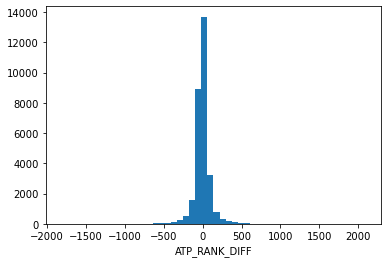

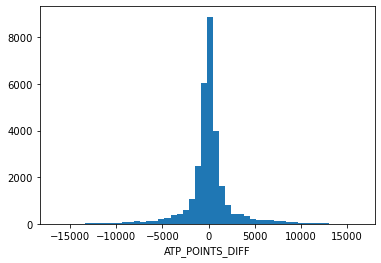

In [1919]:
plt.hist(atp_rank_diff,bins=50)
plt.xlabel("ATP_RANK_DIFF")
plt.show()
plt.hist(atp_points_diff,bins=50)
plt.xlabel("ATP_POINTS_DIFF")
plt.show()

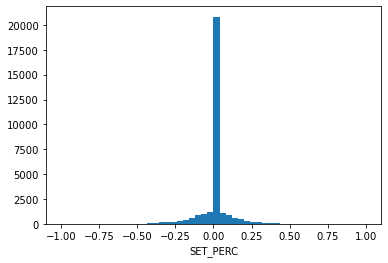

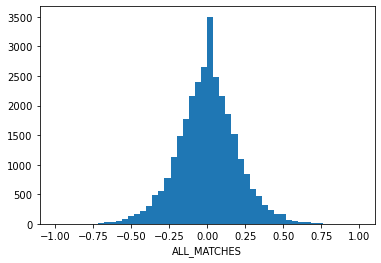

In [1921]:
plt.hist(set_perc,bins=50)
plt.xlabel("SET_PERC")
plt.show()
plt.hist(all_matches_perc,bins=50)
plt.xlabel("ALL_MATCHES")
plt.show()

In [1909]:
atp_rank_diff.mean()

0.0639569635385535

In [1945]:
mat = np.corrcoef([atp_rank_diff.reshape(30114,),atp_points_diff.reshape(30114,),h2h_perc.reshape(30114,), all_matches_perc.reshape(30114,),same_surface_perc.reshape(30114,),tiredness.reshape(30114,)])

<AxesSubplot:>

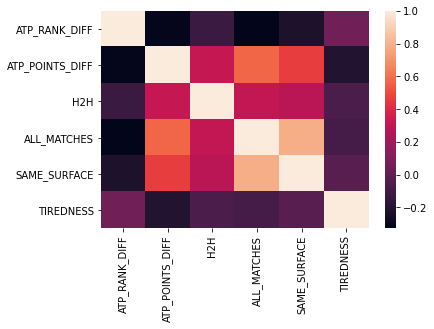

In [1955]:
import seaborn
seaborn.heatmap(mat,xticklabels = ["ATP_RANK_DIFF", "ATP_POINTS_DIFF", "H2H", "ALL_MATCHES", "SAME_SURFACE", "TIREDNESS"], yticklabels=["ATP_RANK_DIFF", "ATP_POINTS_DIFF", "H2H", "ALL_MATCHES", "SAME_SURFACE", "TIREDNESS"])

In [1869]:
player_to_matches_dict_new = {}
for i in range(num_matches):
    winner_name = all_data.at[i,"Winner"]
    loser_name = all_data.at[i,"Loser"]
    if (not (winner_name in player_to_matches_dict_new.keys())):
        player_to_matches_dict_new[winner_name] = [i]
    else:
        player_to_matches_dict_new[winner_name].append(i)
        
    if (not (loser_name in player_to_matches_dict_new.keys())):
        player_to_matches_dict_new[loser_name] = [i]
    else:
        player_to_matches_dict_new[loser_name].append(i)

In [1997]:
rows_to_remove = []
for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
        
    to_append = False
        
    player_1_relevant_matches = player_to_matches_dict_new[player_1_name]
    player_2_relevant_matches = player_to_matches_dict_new[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
    
    num_matches_played_1 = 0
    num_matches_played_2 = 0
    num_common_matches = 0
    
    if (i != player_1_relevant_matches[0]):
        num_matches_played_1 = find_lt(player_1_relevant_matches,i) + 1
    
    if (i != player_2_relevant_matches[0]):
        num_matches_played_2 = find_lt(player_2_relevant_matches,i) + 1
        
    if (i != common_matches[0]):
        num_common_matches = find_lt(common_matches,i) + 1
        
    if (all_data.at[i,"Comment"] != "Completed"):
        to_append = True
        
    if ((num_matches_played_1 < 10 or num_matches_played_2 < 10)):
        to_append=True

    if (atp_rank_diff[i] == 0):
        to_append = True
    
    if (to_append):
        rows_to_remove.append(i)

In [1998]:
len(rows_to_remove)

5567

In [1999]:
full_features = [all_matches_last_year_weighted_by_margin_net,all_matches_last_year_weighted_by_margin_perc,h2h_same_tournament_perc, h2h_same_tournament_net,h2h_same_surface_perc, h2h_same_surface_net,all_matches_last_three_months_perc,all_matches_last_three_months_net,zero_set_perc,zero_set_net,same_round_perc,same_round_net,same_series_perc,same_series_net,h2h_last_time,weighted_games_perc,weighted_games_net,surface_opp_all_matches_perc,surface_opp_all_matches_net,weighted_opp_all_matches_perc,weighted_opp_all_matches_net,weighted_h2h_perc,weighted_h2h_net,weighted_same_surface_perc,weighted_same_surface_net,weighted_all_matches_perc,weighted_all_matches_net,opp_all_matches_perc,opp_all_matches_net,perfect_set_last_year_perc, perfect_set_last_year_net,injured,time_since_last_game,all_matches_last_year_perc, all_matches_last_year_net,tiredness,perfect_set_perc, perfect_set_net,loss_streak,win_streak,set_perc,atp_rank_diff,atp_points_diff,h2h_perc,h2h_net, all_matches_perc, all_matches_net,same_surface_perc,same_surface_net,same_tournament_perc,same_tournament_net, best_of_perc, best_of_net]

In [2000]:
X = np.concatenate(full_features,axis=1)

In [2001]:
X.shape

(30114, 53)

In [2002]:
X_final = np.delete(X,rows_to_remove,0)
target_final =np.delete(target,rows_to_remove,0)

In [2003]:
all_data_new = all_data.drop(rows_to_remove, axis=0)
all_data_new_train = all_data_new[0:len(y_train)]
all_data_new_train =all_data_new_train.reset_index(drop=True)
all_data_new_test = all_data_new[(len(y_train)):(len(y_train) + len(y_test))]
all_data_new_test = all_data_new_test.reset_index(drop=True)

In [2375]:
all_data_new =all_data_new.reset_index(drop=True)

(array([[2.487e+03, 5.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 2.414e+03],
        [2.414e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         1.000e+00, 1.000e+00, 5.000e+00, 2.487e+03]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

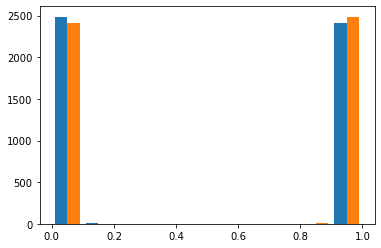

In [2004]:
plt.hist(model.predict_proba(X_test))

(array([2473.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2437.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

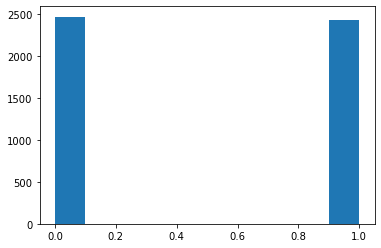

In [2005]:
plt.hist(y_test)

### Conduction a grid search

In [2006]:
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, test_size=0.125, shuffle=False)

In [1994]:
# scaler = StandardScaler()
# X_train_train = scaler.fit_transform(X_train_train)
# X_validation = scaler.transform(X_validation)

In [2007]:
parameters = [('l1', 0.01), ('l1', 0.1), ('l1', 1), ('l1', 10), ('l2', 0.01), ('l2', 0.1), ('l2', 1), ('l2', 10)]

In [2034]:
accuracies = []
for tup in parameters:
    model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty=tup[0], C = tup[1],fit_intercept=False)
    model.fit(X_train_train,y_train_train)
    accuracies.append(accuracy_score(y_validation,model.predict(X_validation))*100)
    print("Validation score for " + str(tup) + " is: " + str(accuracy_score(y_validation,model.predict(X_validation))))

Validation score for ('l1', 0.01) is: 0.6313645621181263
Validation score for ('l1', 0.1) is: 0.6427698574338085
Validation score for ('l1', 1) is: 0.6443991853360489
Validation score for ('l1', 10) is: 0.6456211812627292
Validation score for ('l2', 0.01) is: 0.6386965376782078
Validation score for ('l2', 0.1) is: 0.6374745417515275
Validation score for ('l2', 1) is: 0.6411405295315682
Validation score for ('l2', 10) is: 0.6378818737270876


In [2035]:
param = []
for tup in parameters:
    st = tup[0] + ": " + str(tup[1])
    param.append(st)

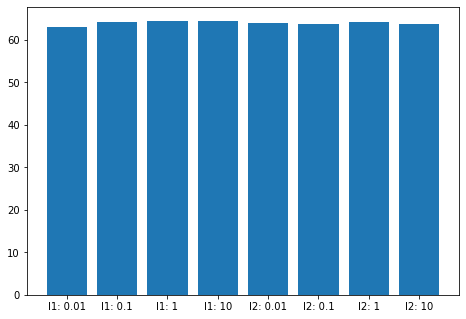

In [2036]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(param,accuracies)
plt.show()

### Choosing tiredness parameters

In [2038]:
partial_features = [all_matches_last_year_weighted_by_margin_net,all_matches_last_year_weighted_by_margin_perc,h2h_same_tournament_perc, h2h_same_tournament_net,h2h_same_surface_perc, h2h_same_surface_net,all_matches_last_three_months_perc,all_matches_last_three_months_net,zero_set_perc,zero_set_net,same_round_perc,same_round_net,same_series_perc,same_series_net,h2h_last_time,weighted_games_perc,weighted_games_net,surface_opp_all_matches_perc,surface_opp_all_matches_net,weighted_opp_all_matches_perc,weighted_opp_all_matches_net,weighted_h2h_perc,weighted_h2h_net,weighted_same_surface_perc,weighted_same_surface_net,weighted_all_matches_perc,weighted_all_matches_net,opp_all_matches_perc,opp_all_matches_net,perfect_set_last_year_perc, perfect_set_last_year_net,injured,time_since_last_game,all_matches_last_year_perc, all_matches_last_year_net,perfect_set_perc, perfect_set_net,loss_streak,win_streak,set_perc,atp_rank_diff,atp_points_diff,h2h_perc,h2h_net, all_matches_perc, all_matches_net,same_surface_perc,same_surface_net,same_tournament_perc,same_tournament_net, best_of_perc, best_of_net]

In [2039]:
day_thresh = [3,4,5]
decay_val = [0.5,0.75,0.9]

In [2040]:
day_decay_tups = []
for day in day_thresh:
    for decay in decay_val:
        tup = (day,decay)
        day_decay_tups.append(tup)

In [2042]:
tiredness_validation_list = []

for tup in day_decay_tups:
    tiredness_validation = np.zeros(num_matches)

    for i in range(num_matches):
        if (i%1000 == 0):
            print(i)
        # Player 1 is the winner
        if (target[i] == 1):
            player_1_name = all_data.at[i,"Winner"]
            player_2_name = all_data.at[i,"Loser"]

        # Player 2 is the winner
        else:
            player_1_name = all_data.at[i,"Loser"]
            player_2_name = all_data.at[i,"Winner"]

        tiredness_1 = 0
        tiredness_2 = 0

        player_1_relevant_matches = player_to_matches_dict[player_1_name]
        player_2_relevant_matches = player_to_matches_dict[player_2_name]
        match_timestamp = all_data.at[i, "Date"]

        for j in player_1_relevant_matches:
            if (j >= i):
                break
            past_match_timestamp = all_data.at[j,"Date"]
            days = (match_timestamp-past_match_timestamp).days
            if (days <= tup[0]):
                num_games = calc_num_games(j)
                tiredness_1 += (num_games*(tup[1]**days))

        for j in player_2_relevant_matches:
            if (j >= i):
                break
            past_match_timestamp = all_data.at[j,"Date"]
            days = (match_timestamp-past_match_timestamp).days
            if (days <= tup[0]):
                num_games = calc_num_games(j)
                tiredness_2 += (num_games*(tup[1]**days))


        tiredness_validation[i] = tiredness_1 - tiredness_2
    tiredness_validation_list.append(tiredness_validation)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
2400

In [2056]:
target.shape

(30114,)

In [2067]:
accuracies = []
for tl in tiredness_validation_list:
    tl = tl.reshape(30114,1)
    tiredness_train, tiredness_test, y_train, y_test = train_test_split(tl, target, test_size=0.2, shuffle=False)
    tiredness_train_train, tiredness_validation, y_train_train, y_validation = train_test_split(tiredness_train, y_train, test_size=0.125, shuffle=False)
    model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1', C = 1,fit_intercept=False)
    model.fit(tiredness_train_train,y_train_train)
    acc = accuracy_score(y_validation,model.predict(tiredness_validation))
    accuracies.append(acc)
    print()

In [2066]:
accuracies

[0.5205843293492696,
 0.5245683930942895,
 0.5249003984063745,
 0.5189243027888446,
 0.5288844621513944,
 0.5252324037184595,
 0.5185922974767596,
 0.5312084993359893,
 0.5255644090305445]

In [2071]:
day_decay_tups

[(3, 0.5),
 (3, 0.75),
 (3, 0.9),
 (4, 0.5),
 (4, 0.75),
 (4, 0.9),
 (5, 0.5),
 (5, 0.75),
 (5, 0.9)]

In [2074]:
str_l = []
for tup in day_decay_tups:
    str_l.append("day:" + str(tup[0]) + ",decay:" + str(tup[1]))

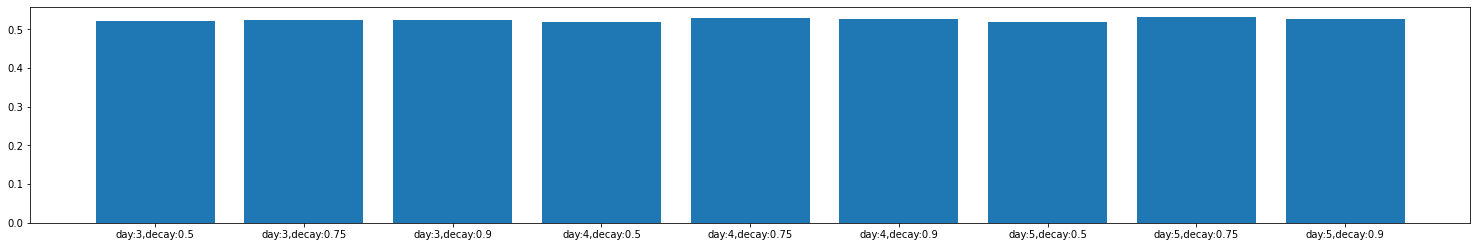

In [2097]:
fig = plt.figure(figsize = (20, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(str_l,accuracies)
plt.show()

### Forward Selection

In [2098]:
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, test_size=0.125, shuffle=False)

In [2099]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(24547, 53)

In [2157]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1', C = 100000000,fit_intercept=False)

In [2107]:
sfs1 = sfs(model,
           scoring='accuracy',
           cv=2)

# Perform SFFS
sfs1 = sfs1.fit(X_train,y_train)

In [2158]:
X_test_transformed = sfs1.transform(X_test)
X_train_transformed = sfs1.transform(X_train)
model.fit(X_train,y_train)
accuracy_score(y_test,model.predict(X_test))

0.6496945010183299

In [2159]:
model.coef_

array([[ 1.23484935e-03,  6.34457292e-02,  3.14924192e+00,
        -1.18524981e+00, -1.15997509e-02, -5.15396856e-03,
        -1.72840783e-01, -2.88965184e-03, -3.83597113e-01,
        -3.98843214e-03,  5.25697259e-02,  1.62337671e-03,
         8.88029293e-02, -1.49504478e-03,  3.02406567e-02,
         2.58372220e+00,  7.65308673e-04,  3.04256621e-02,
        -2.93290008e-02, -8.28311272e-02, -1.12334802e-02,
         1.18682841e+00,  0.00000000e+00, -1.54161651e-01,
         1.28642803e-02, -2.66531804e+00,  1.48848119e-02,
         1.21535169e+00,  1.46521564e-02,  3.30004910e-01,
        -4.36887030e-03, -1.83624813e-01, -3.84737257e-04,
         5.04686561e-01, -2.10138346e-03, -6.93839723e-05,
         1.04377092e+00, -2.18324647e-03, -4.89575006e-02,
         4.67782319e-02, -5.22799219e-01, -9.79189175e-04,
         7.82173916e-05, -1.10522687e+00,  1.77551321e-02,
        -3.48973828e-01, -2.76630998e-03,  9.07815081e-01,
        -4.30614350e-03,  1.31904543e-01,  1.83674674e-0

## Evaluation: Logistic Regression

In [2160]:
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)

In [2162]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2169]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1', C = 1,fit_intercept=False)
model.fit(X_train,y_train)

LogisticRegression(C=1, fit_intercept=False, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [2170]:
print("Training score is: " + str(accuracy_score(y_train,model.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,model.predict(X_test))))

Training score is: 0.7112084330600397
Test score is: 0.6507128309572301


In [2312]:
# ATP Rank Diff baseline
rank_diff_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    if (y_test[i] == 1):
        player_1_name = all_data_new_test.at[i,"Winner"]
        player_2_name = all_data_new_test.at[i,"Loser"]
        if (all_data_new_test.at[i,"WRank"] > all_data_new_test.at[i,"LRank"]):
            rank_diff_pred[i] = 0
        else:
            rank_diff_pred[i] = 1
        
    # Player 2 is the winner
    else:
        player_1_name = all_data_new_test.at[i,"Loser"]
        player_2_name = all_data_new_test.at[i,"Winner"]
        if (all_data_new_test.at[i,"WRank"] > all_data_new_test.at[i,"LRank"]):
            rank_diff_pred[i] = 1
        else:
            rank_diff_pred[i] = 0
        
accuracy_score(rank_diff_pred,y_test)  

0.620162932790224

In [2209]:
full_features = [all_matches_last_year_weighted_by_margin_net,all_matches_last_year_weighted_by_margin_perc,h2h_same_tournament_perc, h2h_same_tournament_net,h2h_same_surface_perc, h2h_same_surface_net,all_matches_last_three_months_perc,all_matches_last_three_months_net,zero_set_perc,zero_set_net,same_round_perc,same_round_net,same_series_perc,same_series_net,h2h_last_time,weighted_games_perc,weighted_games_net,surface_opp_all_matches_perc,surface_opp_all_matches_net,weighted_opp_all_matches_perc,weighted_opp_all_matches_net,weighted_h2h_perc,weighted_h2h_net,weighted_same_surface_perc,weighted_same_surface_net,weighted_all_matches_perc,weighted_all_matches_net,opp_all_matches_perc,opp_all_matches_net,perfect_set_last_year_perc, perfect_set_last_year_net,injured,time_since_last_game,all_matches_last_year_perc, all_matches_last_year_net,tiredness,perfect_set_perc, perfect_set_net,loss_streak,win_streak,set_perc,atp_rank_diff,atp_points_diff,h2h_perc,h2h_net, all_matches_perc, all_matches_net,same_surface_perc,same_surface_net,same_tournament_perc,same_tournament_net, best_of_perc, best_of_net]

In [2176]:
len(full_features)

53

In [2218]:
model.coef_[0]

array([ 1.79215118e-01,  2.08949244e-01,  1.19553618e+00, -4.98498815e-01,
       -5.28581911e-03, -7.65241738e-03,  0.00000000e+00, -2.49926092e-01,
       -5.26199135e-02, -1.33003551e-01,  1.62445652e-02,  4.50518158e-02,
        1.97151938e-02, -5.24089989e-02,  3.21114414e-02,  2.59210570e-01,
        7.10058167e-01,  0.00000000e+00, -6.92137686e-01,  0.00000000e+00,
       -6.77959560e-01,  6.17163262e-01,  0.00000000e+00,  0.00000000e+00,
        4.13796544e-01, -4.32685649e-01,  8.69608152e-01,  2.36752658e-01,
        7.83467178e-01,  6.06482533e-02, -6.31615712e-02, -3.20522078e-02,
       -1.95817805e-02,  0.00000000e+00, -3.04929172e-01, -9.40628742e-04,
        1.53476551e-01, -1.38801903e-01, -1.08538870e-01,  1.57882501e-01,
       -3.77944485e-02, -8.94140200e-02,  2.17817203e-01, -5.76193304e-01,
        2.67241626e-02,  0.00000000e+00, -2.28551058e-01,  1.55709110e-01,
       -2.26858211e-01,  3.77680962e-02,  1.03933464e-01,  3.02005443e-02,
       -2.18119276e-01])

In [2213]:
sum(full_features[1] == all_matches_last_year_weighted_by_margin_perc)[0]

30114

In [2261]:
to_report = [atp_rank_diff,atp_points_diff,all_matches_perc,same_surface_perc,same_tournament_perc,best_of_perc,win_streak,loss_streak,tiredness,time_since_last_game,injured,perfect_set_perc, weighted_games_perc, opp_all_matches_perc]

In [2262]:
to_report_coefs = []

In [2263]:
for i in range(len(to_report)):
    for j in range(len(full_features)):
        if (sum(full_features[j] == to_report[i])[0] == 30114):
            to_report_coefs.append(model.coef_[0][j])
            break
    

In [2264]:
len(to_report)

14

In [2265]:
len(to_report_coefs)

14

In [2266]:
to_report_coefs

[-0.08941402004940385,
 0.21781720292081425,
 0.0,
 0.15570910950009356,
 0.0377680961529249,
 0.030200544327564565,
 0.15788250114117863,
 -0.10853887001770994,
 -0.0009406287422879384,
 -0.019581780541200553,
 -0.032052207845812974,
 0.15347655075438396,
 0.25921056964059946,
 0.2367526576650287]

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

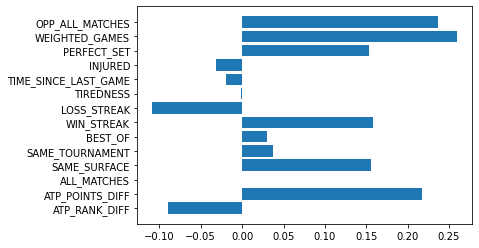

In [2268]:
x = ["ATP_RANK_DIFF", "ATP_POINTS_DIFF", "ALL_MATCHES", "SAME_SURFACE", "SAME_TOURNAMENT", "BEST_OF", "WIN_STREAK", "LOSS_STREAK", "TIREDNESS", "TIME_SINCE_LAST_GAME", "INJURED", "PERFECT_SET", "WEIGHTED_GAMES", "OPP_ALL_MATCHES"]
y = to_report_coefs
ind = np.arange(len(y))

fig, ax = plt.subplots()
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

# new helper method to auto-label bars
for container in ax.containers:
    ax.bar_label(container)

#### Best-of-5 v Best-of-3

In [2271]:
is_best_of_3 = np.zeros(len(y_test))
is_best_of_5 = np.zeros(len(y_test))
for i in range(len(y_test)):
    if (all_data_new_test.at[i,"Best of"] == 3):
        is_best_of_3[i] = True
        is_best_of_5[i] = False
    else:
        is_best_of_3[i] = False
        is_best_of_5[i] = True

In [2293]:
def calc_specific_accuracy(pred_vec, target_vec, bool_vec):
    den = 0
    num = 0
    assert(len(pred_vec) == len(bool_vec))
    assert(len(pred_vec) == len(target_vec))
    for i in range(len(pred_vec)):
        if (bool_vec[i]):
            den = den+1
            if (pred_vec[i] == target_vec[i]):
                num = num+1
    return num/den
        

In [2295]:
calc_specific_accuracy(model.predict(X_test), y_test, is_best_of_3)

0.632610399790959

In [2290]:
sum(is_best_of_3)

3827.0

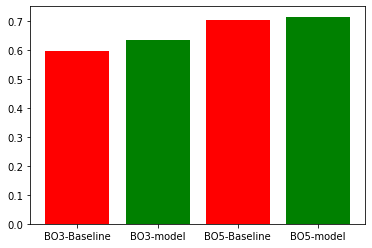

In [2313]:
# create a dataset
height = [calc_specific_accuracy(rank_diff_pred, y_test, is_best_of_3), calc_specific_accuracy(model.predict(X_test), y_test, is_best_of_3), calc_specific_accuracy(rank_diff_pred, y_test, is_best_of_5), calc_specific_accuracy(model.predict(X_test), y_test, is_best_of_5)]
bars = ('BO3-Baseline', 'BO3-model','BO5-Baseline', 'BO5-model')
x_pos = np.arange(len(bars))

# # Create bars with different colors
plt.bar(x_pos, height, color=['red', 'green', 'red','green'])

# # Create names on the x-axis
plt.xticks(x_pos, bars)

# # Show graph
# plt.show()

plt.show()

In [2314]:
height

[0.5970734256597857, 0.632610399790959, 0.7017543859649122, 0.7146814404432132]

In [2320]:
underdog_winner = np.zeros(len(y_test))
obvious_winner = np.zeros(len(y_test))
for i in range(len(y_test)):
    if (y_test[i] == 1):
        if (all_data_new_test.at[i,"WRank"] > all_data_new_test.at[i,"LRank"]):
            underdog_winner[i] = True
        else:
            underdog_winner[i] = False
        obvious_winner[i] = not(underdog_winner[i])

In [2334]:
calc_specific_accuracy(model.predict(X_test), y_test, underdog_winner)

0.32030401737242126

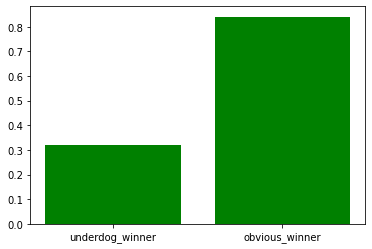

In [2336]:
# create a dataset
height = [calc_specific_accuracy(model.predict(X_test), y_test, underdog_winner), calc_specific_accuracy(model.predict(X_test), y_test, obvious_winner)]
bars = ('underdog_winner', 'obvious_winner')
x_pos = np.arange(len(bars))

# # Create bars with different colors
plt.bar(x_pos, height, color=['green', 'green'])

# # Create names on the x-axis
plt.xticks(x_pos, bars)

# # Show graph
# plt.show()

plt.show()

In [2337]:
height

[0.32030401737242126, 0.8403693931398417]

In [2338]:
## percentage cases where it predicts the worse ranked player to win
pred = model.predict(X_test)
num = 0
for i in range(len(y_test)):
    if (y_test[i] == 1):
        player_1_name = all_data_new_test.at[i,"Winner"]
        player_2_name = all_data_new_test.at[i,"Loser"]
        if (pred[i] == 1): # We predict player 1 to win
            if (all_data_new_test.at[i,"WRank"] > all_data_new_test.at[i,"LRank"]):
                num = num+1
        else: # We predict player 2 to win
            if (all_data_new_test.at[i,"LRank"] > all_data_new_test.at[i,"WRank"]):
                num = num+1
                
    else:
        player_1_name = all_data_new_test.at[i,"Loser"]
        player_2_name = all_data_new_test.at[i,"Winner"]
        if (pred[i] == 1): # We predict player 1 to win
            if (all_data_new_test.at[i,"LRank"] > all_data_new_test.at[i,"WRank"]):
                num = num+1
        else: # We predict player 2 to win
            if (all_data_new_test.at[i,"WRank"] > all_data_new_test.at[i,"LRank"]):
                num = num+1
            
print(num/len(y_test))

0.21751527494908351


In [2343]:
probabs = []
predicted_probabs = model.predict_proba(X_test)
for i in range(len(y_test)):
    probabs.append(predicted_probabs[i][0])


(array([134., 240., 426., 714., 894., 909., 684., 495., 278., 136.]),
 array([0.00112548, 0.10076165, 0.20039783, 0.300034  , 0.39967018,
        0.49930636, 0.59894253, 0.69857871, 0.79821488, 0.89785106,
        0.99748724]),
 <BarContainer object of 10 artists>)

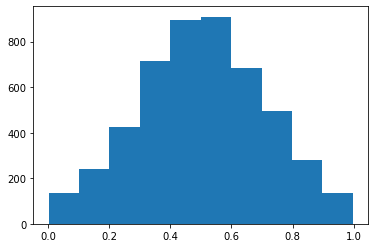

In [2344]:
plt.hist(probabs)

### Restricting test set to matches where players have played at least n games each

In [2379]:
all_data_new.shape[0]

24547

In [2380]:
player_to_matches_dict_new = {}
for i in range(all_data_new.shape[0]):
    winner_name = all_data_new.at[i,"Winner"]
    loser_name = all_data_new.at[i,"Loser"]
    if (not (winner_name in player_to_matches_dict_new.keys())):
        player_to_matches_dict_new[winner_name] = [i]
    else:
        player_to_matches_dict_new[winner_name].append(i)
        
    if (not (loser_name in player_to_matches_dict_new.keys())):
        player_to_matches_dict_new[loser_name] = [i]
    else:
        player_to_matches_dict_new[loser_name].append(i)

In [2412]:
len(y_test)

4910

In [2427]:
list_of_bool_lists = []
num_matches_counted = []
n_list = []
n = 0
while n <= 500:
    bool_list = np.zeros(len(y_test))
    count = 0
    for j in range(len(y_test)):
        # Player 1 is the winner
        i = j + len(y_train)
        if (y_test[j] == 1):
            player_1_name = all_data_new.at[i,"Winner"]
            player_2_name = all_data_new.at[i,"Loser"]
            assert(player_1_name == all_data_new_test.at[j,"Winner"])
            assert(player_2_name == all_data_new_test.at[j,"Loser"])

        # Player 2 is the winner
        else:
            player_1_name = all_data_new.at[i,"Loser"]
            player_2_name = all_data_new.at[i,"Winner"]
            assert(player_2_name == all_data_new_test.at[j,"Winner"])
            assert(player_1_name == all_data_new_test.at[j,"Loser"])

        player_1_relevant_matches = player_to_matches_dict_new[player_1_name]
        player_2_relevant_matches = player_to_matches_dict_new[player_2_name]

        num_matches_played_1 = 0
        num_matches_played_2 = 0
        num_common_matches = 0

        if (i != player_1_relevant_matches[0]):
            num_matches_played_1 = find_lt(player_1_relevant_matches,i) + 1

        if (i != player_2_relevant_matches[0]):
            num_matches_played_2 = find_lt(player_2_relevant_matches,i) + 1

        if ((num_matches_played_1 > n and num_matches_played_2 > n)):
            bool_list[j] = True
            count = count + 1
        else:
            bool_list[j] = False
    n_list.append(n)
    n = n + 10
    num_matches_counted.append(count)
    list_of_bool_lists.append(bool_list)

In [2428]:
accuracies = []
for i in range(len(list_of_bool_lists)):
    accuracies.append(calc_specific_accuracy(model.predict(X_test), y_test, list_of_bool_lists[i]))

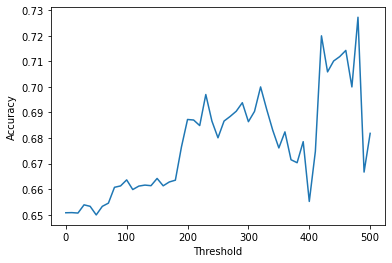

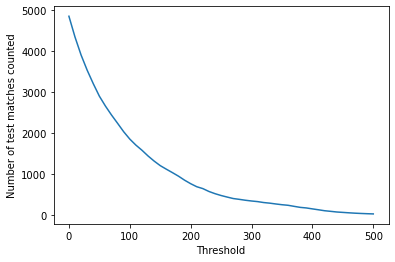

In [2433]:
plt.plot(n_list,accuracies)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()
plt.plot(n_list,num_matches_counted)
plt.xlabel("Threshold")
plt.ylabel("Number of test matches counted")
plt.show()

## Evaluating other models

In [2441]:
## Logistic regression with higher degree features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_final_poly = poly.fit_transform(X_final)
X_train, X_test, y_train, y_test = train_test_split(X_final_poly, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2466]:
X_final_poly.shape

(24547, 1485)

In [2443]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1', C = 1,fit_intercept=False)
model.fit(X_train,y_train)
print("Training score is: " + str(accuracy_score(y_train,model.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,model.predict(X_test))))

Training score is: 0.7246524418190151
Test score is: 0.634826883910387


In [2444]:
### Support Vector Machine
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = svm.SVC()
clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 0.72546723022865
Test score is: 0.6468431771894094


In [2448]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 1.0
Test score is: 0.5663951120162933


In [2452]:
## Random Forest (max_depth = 10)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 10)
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 0.792687274023527
Test score is: 0.6490835030549899


In [2453]:
## Random Forest (max_depth = 15)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 10)
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 0.79182156133829
Test score is: 0.6458248472505091


In [2454]:
## Random Forest (max_depth = 5)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 10)
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 0.7949788664256251
Test score is: 0.6429735234215886


In [2457]:
## Random Forest (max_depth = none)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 1.0
Test score is: 0.6342158859470468


In [2458]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 0.6851861282273259
Test score is: 0.6118126272912424


In [2460]:
## Knearest neighbors (neighbors = 3)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, weights="distance")
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
neigh.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,neigh.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,neigh.predict(X_test))))

Training score is: 1.0
Test score is: 0.5820773930753564


In [2461]:
## Knearest neighbors (neighbors = 10)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, weights="distance")
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
neigh.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,neigh.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,neigh.predict(X_test))))

Training score is: 1.0
Test score is: 0.594704684317719


In [2462]:
## Knearest neighbors (neighbors = 100)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100, weights="distance")
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
neigh.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,neigh.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,neigh.predict(X_test))))

Training score is: 1.0
Test score is: 0.6321792260692465


In [2464]:
## Knearest neighbors (neighbors = 500)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=500, weights="distance")
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
neigh.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,neigh.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,neigh.predict(X_test))))

Training score is: 1.0
Test score is: 0.6346232179226069


In [2465]:
## Logistic regression with higher degree features
X_train, X_test, y_train, y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1', C = 1,fit_intercept=False)
model.fit(X_train,y_train)
print("Training score is: " + str(accuracy_score(y_train,model.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,model.predict(X_test))))

Training score is: 0.7111065845088353
Test score is: 0.6505091649694501


## Unit Betting

In [2716]:
pred_vec = model.predict_proba(X_test)
pred_prob = []
for i in pred_vec:
    pred_prob.append(i[1])

In [2719]:
investment = 0
revenue = 0
investment_list = [0]
revenue_list = [0]
number_of_bets = 0

for i in range(len(y_test)):
    bet_on_1 = False
    bet_on_2 = False
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
    if (pred_prob[i] > 0.5):
        if (pred_prob[i] > (1/odds_player_1)):
            investment = investment+1
            bet_on_1 = True
            number_of_bets += 1
    if (pred_prob[i] < 0.5):
        if ((1 - pred_prob[i]) > (1/odds_player_2)):
            investment = investment+1
            bet_on_2 = True
            number_of_bets += 1
    
    if (bet_on_1 and (y_test[i] == 1)):
        revenue = revenue + (odds_player_1)
    
    if (bet_on_2 and (y_test[i] == 0)):
        revenue = revenue + (odds_player_2)
    investment_list.append(investment)
    revenue_list.append(revenue)

In [2720]:
profit_list = []
for i in range(len(investment_list)):
    profit_list.append(revenue_list[i] - investment_list[i])

Text(0, 0.5, 'Profit')

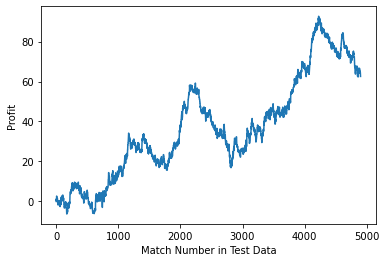

In [2727]:
plt.plot(profit_list)
plt.xlabel("Match Number in Test Data")
plt.ylabel("Profit")

In [2728]:
(revenue-investment)/investment

0.026332631578948117

In [2723]:
revenue-investment

62.54000000000178

In [2726]:
len(investment_list)

4901

In [2725]:
number_of_bets

2375

## Unit Betting with baseline

In [2732]:
investment = 0
revenue = 0
investment_list = [0]
revenue_list = [0]

for i in range(len(y_test)):
    bet_on_1 = False
    bet_on_2 = False
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
    if (rank_diff_pred[i] == 1):
        investment = investment+1
        bet_on_1 = True
    if (rank_diff_pred[i] == 0):
        investment = investment+1
        bet_on_2 = True
    
    if (bet_on_1 and (y_test[i] == 1)):
        revenue = revenue + (odds_player_1)
    
    if (bet_on_2 and (y_test[i] == 0)):
        revenue = revenue + (odds_player_2)
        
    investment_list.append(investment)
    revenue_list.append(revenue)

In [2733]:
profit_list = []
for i in range(len(investment_list)):
    profit_list.append(revenue_list[i] - investment_list[i])

In [2734]:
investment

4900

Text(0, 0.5, 'Profit')

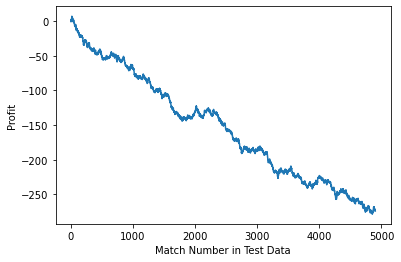

In [2737]:
plt.plot(profit_list)
plt.xlabel("Match Number in Test Data")
plt.ylabel("Profit")

In [2738]:
revenue-investment

-274.07599999999184

## Unit betting on obvious

In [2747]:
investment = 0
revenue = 0
investment_list = [0]
revenue_list = [0]

for i in range(len(y_test)):
    bet_on_1 = False
    bet_on_2 = False
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
    if (odds_player_1 > odds_player_2):
        investment = investment+1
        bet_on_2 = True
    if (odds_player_1 < odds_player_2):
        investment = investment+1
        bet_on_1 = True
    
    if (bet_on_1 and (y_test[i] == 1)):
        revenue = revenue + (odds_player_1)
    
    if (bet_on_2 and (y_test[i] == 0)):
        revenue = revenue + (odds_player_2)
        
    investment_list.append(investment)
    revenue_list.append(revenue)

In [2748]:
profit_list = []
for i in range(len(investment_list)):
    profit_list.append(revenue_list[i] - investment_list[i])

Text(0, 0.5, 'Profit')

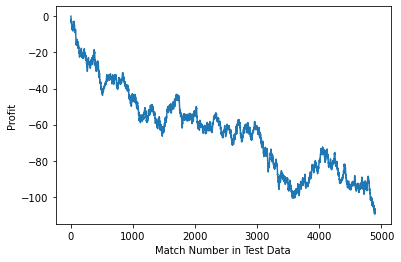

In [2749]:
plt.plot(profit_list)
plt.xlabel("Match Number in Test Data")
plt.ylabel("Profit")

In [2750]:
investment

4878

In [2752]:
revenue - investment

-109.2159999999958

## Unit betting on underdog

In [2753]:
investment = 0
revenue = 0
investment_list = [0]
revenue_list = [0]

for i in range(len(y_test)):
    bet_on_1 = False
    bet_on_2 = False
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
    if (odds_player_1 > odds_player_2):
        investment = investment+1
        bet_on_1 = True
    if (odds_player_1 < odds_player_2):
        investment = investment+1
        bet_on_2 = True
    
    if (bet_on_1 and (y_test[i] == 1)):
        revenue = revenue + (odds_player_1)
    
    if (bet_on_2 and (y_test[i] == 0)):
        revenue = revenue + (odds_player_2)
        
    investment_list.append(investment)
    revenue_list.append(revenue)

In [2754]:
profit_list = []
for i in range(len(investment_list)):
    profit_list.append(revenue_list[i] - investment_list[i])

Text(0, 0.5, 'Profit')

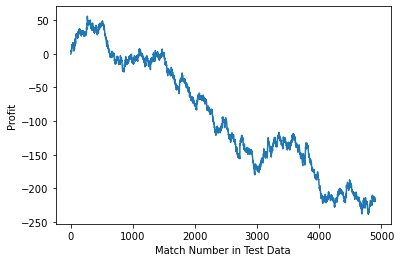

In [2755]:
plt.plot(profit_list)
plt.xlabel("Match Number in Test Data")
plt.ylabel("Profit")

In [2756]:
investment

4878

In [2757]:
revenue-investment

-216.87999999999374

## Fixed percentage betting - model

In [2759]:
stack = 100
stack_list = [100]
bet_proportion = 0.01

for i in range(len(y_test)):
    bet_on_1 = False
    bet_on_2 = False
    bet = 0
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
        
#     if (i == 4311):
#         continue
    if (pred_prob[i] > 0.5):
        if (pred_prob[i] > (1/odds_player_1)):
            bet = stack*bet_proportion
            stack = stack - bet
            bet_on_1 = True
    if (pred_prob[i] < 0.5):
        if ((1 - pred_prob[i]) > (1/odds_player_2)):
            bet = stack*bet_proportion
            stack = stack - bet
            bet_on_2 = True
    
    if (bet_on_1 and (y_test[i] == 1)):
        stack = stack + (odds_player_1*bet)
    
    if (bet_on_2 and (y_test[i] == 0)):
        stack = stack + (odds_player_2*bet)
    stack_list.append(stack)

Text(0, 0.5, 'Stack Value')

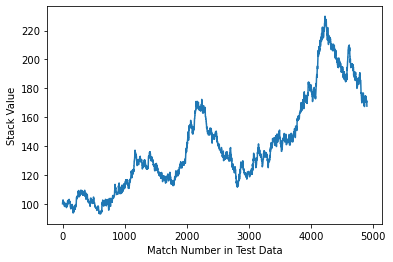

In [2764]:
plt.plot(stack_list)
plt.xlabel("Match Number in Test Data")
plt.ylabel("Stack Value")

In [2763]:
stack_list[len(stack_list)-1]

167.62061874249758

## Fixed Percentage Betting - baseline

In [2765]:
stack = 100
stack_list = [100]
bet_proportion = 0.01

for i in range(len(y_test)):
    bet_on_1 = False
    bet_on_2 = False
    bet = 0
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
    if (rank_diff_pred[i] == 1):
        bet = stack*bet_proportion
        stack = stack - bet
        bet_on_1 = True
    if (rank_diff_pred[i] == 0):
        bet = stack*bet_proportion
        stack = stack - bet
        bet_on_2 = True
    
    if (bet_on_1 and (y_test[i] == 1)):
        stack = stack + (odds_player_1*bet)
    
    if (bet_on_2 and (y_test[i] == 0)):
        stack = stack + (odds_player_2*bet)
    stack_list.append(stack)

Text(0, 0.5, 'Stack Value')

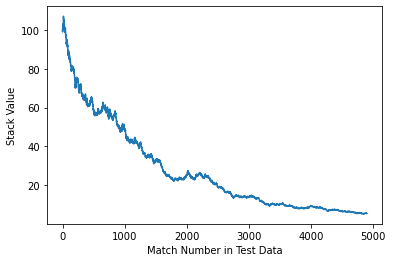

In [2769]:
plt.plot(stack_list)
plt.xlabel("Match Number in Test Data")
plt.ylabel("Stack Value")

In [2767]:
stack

5.475693313825008

In [2768]:
stack_list[len(stack_list)-1]

5.475693313825008

### Fractional betting but varying proportion

In [2770]:
bet_proportion = 0.01
bet_proportion_list = []
roi_list = []
while (bet_proportion <= 1):
    stack = 100

    for i in range(len(y_test)):
        bet_on_1 = False
        bet_on_2 = False
        bet = 0
        if (y_test[i] == 1):
            odds_player_1 = all_data_new_test.at[i,"PSW"]
            odds_player_2 = all_data_new_test.at[i,"PSL"]
        else:
            odds_player_1 = all_data_new_test.at[i,"PSL"]
            odds_player_2 = all_data_new_test.at[i,"PSW"]

        if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
            continue

        if (pred_prob[i] > 0.5):
            if (pred_prob[i] > (1/odds_player_1)):
                bet = stack*bet_proportion
                stack = stack - bet
                bet_on_1 = True
        if (pred_prob[i] < 0.5):
            if ((1 - pred_prob[i]) > (1/odds_player_2)):
                bet = stack*bet_proportion
                stack = stack - bet
                bet_on_2 = True

        if (bet_on_1 and (y_test[i] == 1)):
            stack = stack + (odds_player_1*bet)

        if (bet_on_2 and (y_test[i] == 0)):
            stack = stack + (odds_player_2*bet)
    
    bet_proportion_list.append(bet_proportion)
    bet_proportion += 0.01
    roi_list.append((stack-100))

Text(0, 0.5, 'Return on Investment %')

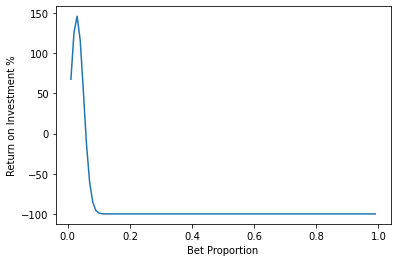

In [2777]:
plt.plot(bet_proportion_list, roi_list)
plt.xlabel("Bet Proportion")
plt.ylabel("Return on Investment %")

In [2780]:
roi_list

[67.62061874249758,
 126.19752181479714,
 146.0312395888245,
 115.89375658184014,
 52.948201787217954,
 -12.47819983692358,
 -59.53509306342383,
 -84.88295310030585,
 -95.43718913831886,
 -98.88764512583992,
 -99.78107930119903,
 -99.96524077518549,
 -99.99555142210257,
 -99.99954155256964,
 -99.99996200329751,
 -99.99999747080477,
 -99.99999986500684,
 -99.99999999423278,
 -99.99999999980317,
 -99.99999999999464,
 -99.99999999999989,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -1

## Model betting with Kelly Criterion

In [2786]:
stack = 100
stack_list = [100]
bet_proportion_list = []

for i in range(len(y_test)):
    bet_on_1 = False
    bet_on_2 = False
    bet = 0
    bet_proportion = 0
    
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
        
    if (pred_prob[i] > 0.5):
        if (pred_prob[i] > (1/odds_player_1)):
            bet_proportion = pred_prob[i] + ((pred_prob[i] - 1)/(odds_player_1 - 1))
            bet = stack*bet_proportion
            stack = stack - bet
            bet_on_1 = True
            bet_proportion_list.append(bet_proportion)
    if (pred_prob[i] < 0.5):
        if ((1 - pred_prob[i]) > (1/odds_player_2)):
            bet_proportion = (1-pred_prob[i]) + ((-pred_prob[i])/(odds_player_2 - 1))
            bet = stack*bet_proportion
            stack = stack - bet
            bet_on_2 = True
            bet_proportion_list.append(bet_proportion)
    
    if (bet_on_1 and (y_test[i] == 1)):
        stack = stack + (odds_player_1*bet)
    
    if (bet_on_2 and (y_test[i] == 0)):
        stack = stack + (odds_player_2*bet)
    stack_list.append(stack)

Text(0, 0.5, 'Stack Value')

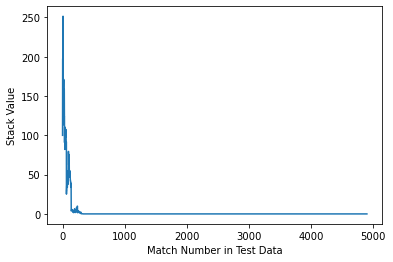

In [2787]:
plt.plot(stack_list)
plt.xlabel("Match Number in Test Data")
plt.ylabel("Stack Value")

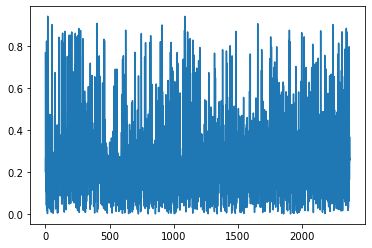

In [2788]:
plt.plot(bet_proportion_list)

## Model Betting with Fractional Kelly

In [2803]:
fraction_list = []
fraction = 0.01
roi_list = []

while (fraction <= 1):
    stack = 100
    for i in range(len(y_test)):
        bet_on_1 = False
        bet_on_2 = False
        bet = 0
        bet_proportion = 0

        if (y_test[i] == 1):
            odds_player_1 = all_data_new_test.at[i,"PSW"]
            odds_player_2 = all_data_new_test.at[i,"PSL"]
        else:
            odds_player_1 = all_data_new_test.at[i,"PSL"]
            odds_player_2 = all_data_new_test.at[i,"PSW"]

        if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
            continue

        if (i == 4311):
            continue

        if (pred_prob[i] > 0.5):
            if (pred_prob[i] > (1/odds_player_1)):
                bet_proportion = pred_prob[i] + ((pred_prob[i] - 1)/(odds_player_1 - 1))
                bet = stack*bet_proportion*fraction
                stack = stack - bet
                bet_on_1 = True
        if (pred_prob[i] < 0.5):
            if ((1 - pred_prob[i]) > (1/odds_player_2)):
                bet_proportion = (1-pred_prob[i]) + ((-pred_prob[i])/(odds_player_2 - 1))
                bet = stack*bet_proportion*fraction
                stack = stack - bet
                bet_on_2 = True

        if (bet_on_1 and (y_test[i] == 1)):
            stack = stack + (odds_player_1*bet)

        if (bet_on_2 and (y_test[i] == 0)):
            stack = stack + (odds_player_2*bet)
    fraction_list.append(fraction)
    roi_list.append((stack-100))
    fraction += 0.01

Text(0, 0.5, 'Return on Investment %')

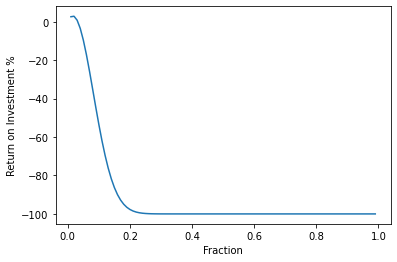

In [2811]:
plt.plot(fraction_list,roi_list)
plt.xlabel("Fraction")
plt.ylabel("Return on Investment %")

## Filtering by certainty

In [2876]:
stack = 100
stack_list = [100]
bet_proportion = 0.03
n = 100

for j in range(len(y_test)):
    i = j + len(y_train)
    bet_on_1 = False
    bet_on_2 = False
    bet = 0
    if (y_test[j] == 1):
        odds_player_1 = all_data_new_test.at[j,"PSW"]
        odds_player_2 = all_data_new_test.at[j,"PSL"]
        player_1_name = all_data_new.at[i,"Winner"]
        player_2_name = all_data_new.at[i,"Loser"]
    else:
        player_1_name = all_data_new.at[i,"Loser"]
        player_2_name = all_data_new.at[i,"Winner"]
        odds_player_1 = all_data_new_test.at[j,"PSL"]
        odds_player_2 = all_data_new_test.at[j,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        continue
        
    player_1_relevant_matches = player_to_matches_dict_new[player_1_name]
    player_2_relevant_matches = player_to_matches_dict_new[player_2_name]

    num_matches_played_1 = 0
    num_matches_played_2 = 0
    num_common_matches = 0

    if (i != player_1_relevant_matches[0]):
        num_matches_played_1 = find_lt(player_1_relevant_matches,i) + 1

    if (i != player_2_relevant_matches[0]):
        num_matches_played_2 = find_lt(player_2_relevant_matches,i) + 1
        
    if ((num_matches_played_1 > n and num_matches_played_2 > n)):
#     if (all_data_new_test.at[j,"Best of"] == 5):
        if (pred_prob[j] > 0.5):
            if (pred_prob[j] > (1/odds_player_1)):
                bet = stack*bet_proportion
                stack = stack - bet
                bet_on_1 = True
        if (pred_prob[j] < 0.5):
            if ((1 - pred_prob[j]) > (1/odds_player_2)):
                bet = stack*bet_proportion
                stack = stack - bet
                bet_on_2 = True

        if (bet_on_1 and (y_test[j] == 1)):
            stack = stack + (odds_player_1*bet)

        if (bet_on_2 and (y_test[j] == 0)):
            stack = stack + (odds_player_2*bet)
    stack_list.append(stack)

Text(0, 0.5, 'Stack')

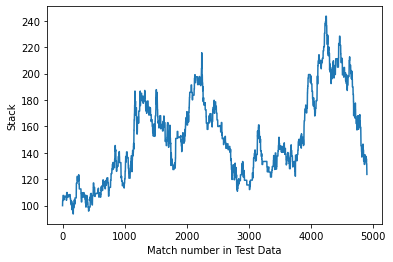

In [2877]:
plt.plot(stack_list)
plt.xlabel("Match number in Test Data")
plt.ylabel("Stack")

In [2869]:
stack_list[len(stack_list)-1] # Best-of-3

379.65420382735647

In [2872]:
stack_list[len(stack_list)-1] # Best-of-5

64.80403406798693

In [2875]:
stack_list[len(stack_list)-1] # n = 20

159.0033653637462

In [2878]:
stack_list[len(stack_list)-1] # n = 100

123.64203335907193

In [ ]:
i = j + len(y_train)
        if (y_test[j] == 1):
            player_1_name = all_data_new.at[i,"Winner"]
            player_2_name = all_data_new.at[i,"Loser"]
            assert(player_1_name == all_data_new_test.at[j,"Winner"])
            assert(player_2_name == all_data_new_test.at[j,"Loser"])

        # Player 2 is the winner
        else:
            player_1_name = all_data_new.at[i,"Loser"]
            player_2_name = all_data_new.at[i,"Winner"]
            assert(player_2_name == all_data_new_test.at[j,"Winner"])
            assert(player_1_name == all_data_new_test.at[j,"Loser"])

        player_1_relevant_matches = player_to_matches_dict_new[player_1_name]
        player_2_relevant_matches = player_to_matches_dict_new[player_2_name]

        num_matches_played_1 = 0
        num_matches_played_2 = 0
        num_common_matches = 0

        if (i != player_1_relevant_matches[0]):
            num_matches_played_1 = find_lt(player_1_relevant_matches,i) + 1

        if (i != player_2_relevant_matches[0]):
            num_matches_played_2 = find_lt(player_2_relevant_matches,i) + 1

        if ((num_matches_played_1 > n and num_matches_played_2 > n)):
            bool_list[j] = True
            count = count + 1
        else:
            bool_list[j] = False

## Miscellaneous

In [2700]:
for i in range(len(y_test)):
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
    if ((1/odds_player_1) > 0.8) and (pred_prob[i] < 0.4):
        print(all_data_new_test.loc[i])
        print(odds_player_1)

ATP                            19
Location                 New York
Tournament                US Open
Date          2020-09-01 00:00:00
Series                 Grand Slam
Court                     Outdoor
Surface                      Hard
Round                   1st Round
Best of                         5
Winner                  Rublev A.
Loser                   Chardy J.
WRank                        14.0
LRank                        60.0
WPts                       2234.0
LPts                        860.0
W1                            6.0
L1                            4.0
W2                            6.0
L2                            4.0
W3                            6.0
L3                            3.0
W4                            NaN
L4                            NaN
W5                            NaN
L5                            NaN
Wsets                         3.0
Lsets                         0.0
Comment                 Completed
B365W                        1.12
B365L         

In [2693]:
psw_pred = np.zeros(len(y_test))

for i in range(len(y_test)):
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (odds_player_1 > odds_player_2):
        psw_pred[i] = 0
    else:
        psw_pred[i] = 1

In [2694]:
accuracy_score(psw_pred,y_test)

0.6786150712830957

In [2667]:
all_data_new_test.loc[2537]

ATP                            22
Location                    Paris
Tournament            French Open
Date          2020-09-30 00:00:00
Series                 Grand Slam
Court                     Outdoor
Surface                      Clay
Round                   2nd Round
Best of                         5
Winner                   Nadal R.
Loser                 Mcdonald M.
WRank                         2.0
LRank                       236.0
WPts                       9850.0
LPts                        217.0
W1                            6.0
L1                            1.0
W2                            6.0
L2                            0.0
W3                            6.0
L3                            3.0
W4                            NaN
L4                            NaN
W5                            NaN
L5                            NaN
Wsets                         3.0
Lsets                         0.0
Comment                 Completed
B365W                        1.01
B365L         

In [2679]:
bet365_probability = np.zeros(len(y_test))

for i in range(len(y_test)):
    if (y_test[i] == 1):
        odds_player_1 = all_data_new_test.at[i,"PSW"]
        odds_player_2 = all_data_new_test.at[i,"PSL"]
    else:
        odds_player_1 = all_data_new_test.at[i,"PSL"]
        odds_player_2 = all_data_new_test.at[i,"PSW"]
        
    if (np.isnan(odds_player_1) or np.isnan(odds_player_2)):
        bet365_probability[i] = 0.5
        
    else:
        bet365_probability[i] = 1/odds_player_1
    

In [2891]:
c = []
for i in range(len(y_test)):
    if (y_test[i] == 1):
        c.append('g')
    else:
        c.append('r')

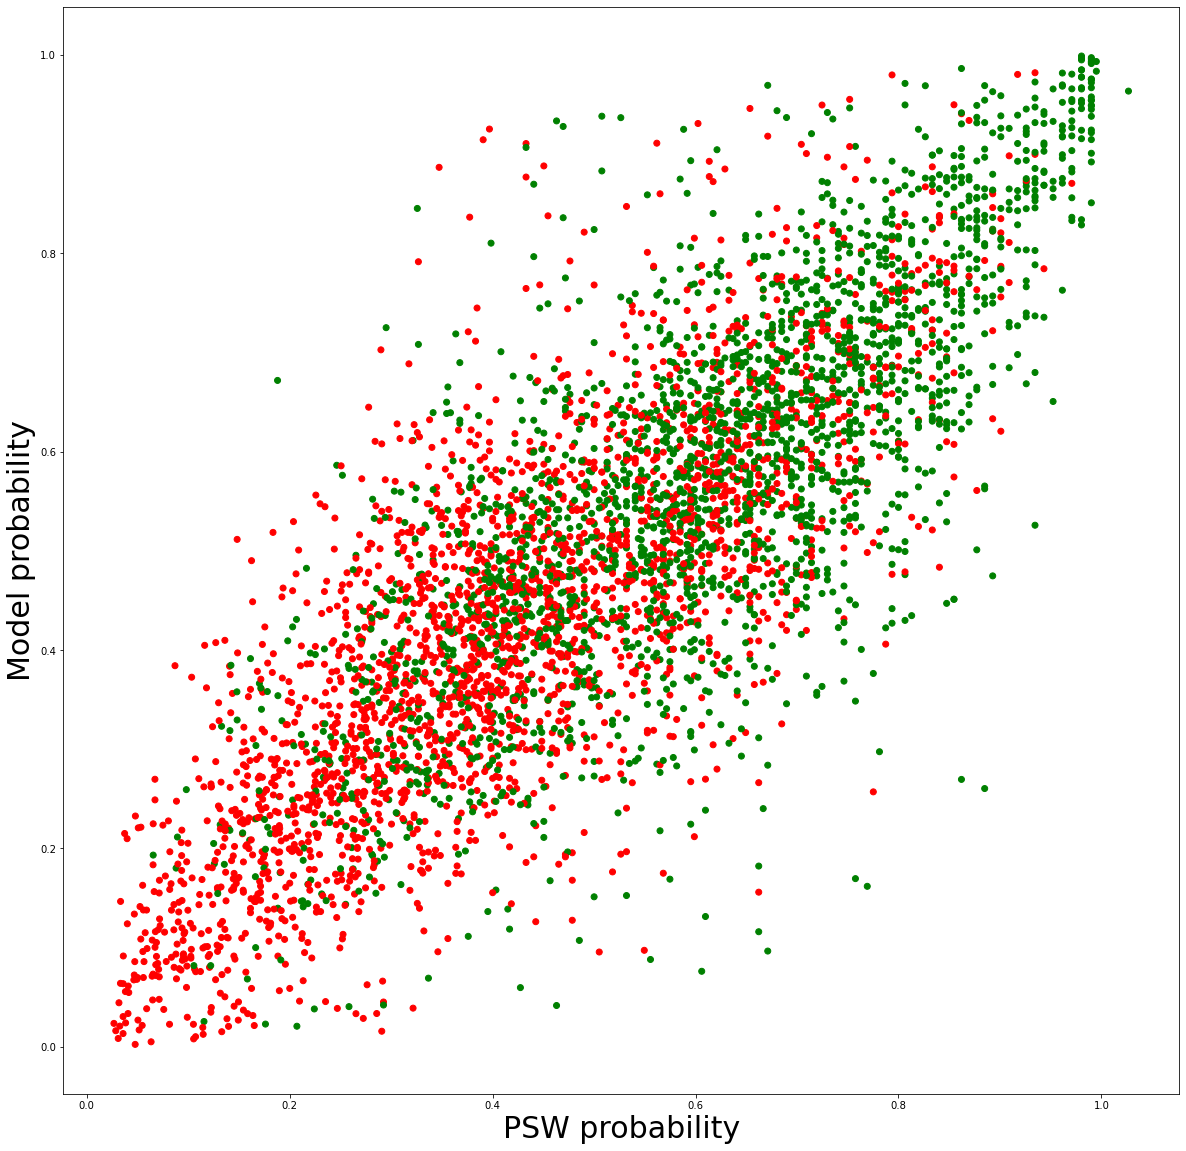

In [2898]:
plt.figure(figsize=(20, 20))
plt.xlabel("PSW probability", fontsize=30)
plt.ylabel("Model probability", fontsize=30)
plt.scatter(bet365_probability, pred_prob,c=c)

In [2901]:
np.corrcoef(bet365_probability, pred_prob)[0,1]

0.8117084103470399

In [2890]:
col

array(['r', 'r', 'b', ..., 'r', 'b', 'b'], dtype='<U1')

In [1803]:
all_data.shape

(30114, 42)

In [1804]:
atp_rank_diff.shape

(30114, 1)

In [1805]:
len(rows_to_remove)

13898

In [1855]:
full_features = [all_matches_last_year_weighted_by_margin_net,all_matches_last_year_weighted_by_margin_perc,h2h_same_tournament_perc, h2h_same_tournament_net,h2h_same_surface_perc, h2h_same_surface_net,all_matches_last_three_months_perc,all_matches_last_three_months_net,zero_set_perc,zero_set_net,same_round_perc,same_round_net,same_series_perc,same_series_net,h2h_last_time,weighted_games_perc,weighted_games_net,surface_opp_all_matches_perc,surface_opp_all_matches_net,weighted_opp_all_matches_perc,weighted_opp_all_matches_net,weighted_h2h_perc,weighted_h2h_net,weighted_same_surface_perc,weighted_same_surface_net,weighted_all_matches_perc,weighted_all_matches_net,opp_all_matches_perc,opp_all_matches_net,perfect_set_last_year_perc, perfect_set_last_year_net,injured,time_since_last_game,all_matches_last_year_perc, all_matches_last_year_net,tiredness,perfect_set_perc, perfect_set_net,loss_streak,win_streak,set_perc,atp_rank_diff,atp_points_diff,h2h_perc,h2h_net, all_matches_perc, all_matches_net,same_surface_perc,same_surface_net,same_tournament_perc,same_tournament_net, best_of_perc, best_of_net]

In [1856]:
len(full_features)

53

In [1857]:
X_train.shape

(23135, 30)

In [1863]:
X_train,X_test,y_train,y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1974]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l2', C = 10,fit_intercept=False)
selector = RFE(estimator,step=1)
selector = selector.fit(X_train, y_train)

In [1865]:
len(selector.support_)

53

In [1866]:
X_final = selector.transform(X_final)
X_train,X_test,y_train,y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1867]:
X_train.shape

(23135, 26)

In [1858]:
X = np.concatenate(full_features,axis=1)

In [1859]:
X.shape

(30114, 53)

In [1827]:
target.shape

(30114,)

In [1860]:
X_final = np.delete(X,rows_to_remove,0)

In [1862]:
target_final =np.delete(target,rows_to_remove,0)

In [2017]:
X_train,X_test,y_train,y_test = train_test_split(X_final, target_final, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1831]:
X_final.shape

(28919, 30)

In [1832]:
y_test.shape

(5784,)

In [2037]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1', C = 1,fit_intercept=False)
model.fit(X_train,y_train)
print("Training score is: " + str(accuracy_score(y_train,model.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,model.predict(X_test))))

Training score is: 0.7111575087844375
Test score is: 0.6503054989816701


In [1784]:
len(model.predict(X_test))

2020

In [1785]:
X_test[4]

array([-2.35000000e+02, -5.68002660e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.25713574e-01, -3.45000000e+02,
        1.62733393e-01,  4.50000000e+01, -1.98351648e-01, -6.40000000e+01,
       -2.65372168e-01, -2.04000000e+02,  1.00000000e+00, -1.51820539e-01,
       -1.77263765e+03, -2.10685552e-01, -9.30730822e+01, -2.10685552e-01,
       -9.30730822e+01, -2.38238230e-01,  0.00000000e+00, -5.07568688e-02,
        1.95034230e+01, -2.10212091e-01, -1.10199915e+02, -2.23327457e-01,
       -2.67000000e+02, -1.67164179e-01, -1.60000000e+01,  0.00000000e+00,
        0.00000000e+00, -2.25713574e-01, -3.45000000e+02,  2.67070312e+01,
       -2.23823037e-01, -2.73000000e+02,  0.00000000e+00,  5.00000000e+00,
        0.00000000e+00,  4.00000000e+00, -6.07500000e+03, -3.33333333e-01,
       -9.55566321e-01, -2.25713574e-01, -3.45000000e+02, -6.92073171e-02,
       -8.00000000e+00,  7.93650794e-03, -3.00000000e+00, -2.16211790e-01,
       -1.87000000e+02])

In [1786]:
all_data_new_test.shape

(5784, 42)

In [1652]:
all_data_new_test.loc[4]

ATP                            53
Location                 New York
Tournament                US Open
Date          2018-08-27 00:00:00
Series                 Grand Slam
Court                     Outdoor
Surface                      Hard
Round                   1st Round
Best of                         5
Winner                Pospisil V.
Loser                    Lacko L.
WRank                        88.0
LRank                        77.0
WPts                        642.0
LPts                        736.0
W1                            7.0
L1                            5.0
W2                            6.0
L2                            3.0
W3                            6.0
L3                            2.0
W4                            NaN
L4                            NaN
W5                            NaN
L5                            NaN
Wsets                         3.0
Lsets                         0.0
Comment                 Completed
B365W                        1.61
B365L         

In [1633]:
rank_diff_pred

array([1., 1., 0., ..., 0., 1., 0.])

In [1752]:
l = (model.predict(X_test) == rank_diff_pred)

In [1753]:
for i in range(len(l)):
    if (not l[i]):
        print(i)

In [1754]:
np.sum(l)

5784

In [1720]:
X_test[1210]

array([0.])

In [1513]:
X_test.shape

(6023, 1)

In [1657]:
all_data_new_test.shape

(5800, 42)

In [1721]:
(all_data_new_test).loc[1210]

ATP                                   41
Location                         Newport
Tournament    Hall of Fame Championships
Date                 2019-07-15 00:00:00
Series                            ATP250
Court                            Outdoor
Surface                            Grass
Round                          1st Round
Best of                                3
Winner                      Majchrzak K.
Loser                            Gray A.
WRank                              102.0
LRank                                NaN
WPts                               550.0
LPts                                 NaN
W1                                   6.0
L1                                   3.0
W2                                   6.0
L2                                   4.0
W3                                   NaN
L3                                   NaN
W4                                   NaN
L4                                   NaN
W5                                   NaN
L5              

In [1787]:
model.coef_

array([[ 2.46092270e-03,  0.00000000e+00,  1.26142558e+00,
         0.00000000e+00,  0.00000000e+00, -2.03762438e-02,
         0.00000000e+00, -9.10443977e-04,  0.00000000e+00,
        -6.50044129e-03,  0.00000000e+00,  5.65745828e-03,
         0.00000000e+00, -1.61428608e-03,  8.84072625e-02,
         0.00000000e+00,  3.05053249e-04,  0.00000000e+00,
        -1.32124022e-03,  0.00000000e+00, -3.04676700e-03,
         1.16987824e-01,  0.00000000e+00,  2.79413381e-01,
         5.14344419e-03,  0.00000000e+00,  5.94236543e-03,
         1.14368602e+00, -3.20844883e-03,  1.45383768e-01,
        -6.88759933e-03,  0.00000000e+00, -5.99556735e-04,
         0.00000000e+00, -6.14132979e-04, -2.34469364e-03,
         0.00000000e+00,  7.77994829e-04, -8.92191635e-02,
         6.60554580e-02,  0.00000000e+00, -1.85071894e-03,
         2.65629527e-05,  0.00000000e+00,  2.75296613e-02,
         0.00000000e+00, -4.97664304e-04,  5.65948023e-02,
         5.21300181e-04,  2.89526113e-01,  1.61607940e-0

In [1788]:
all_data_new = all_data.drop(rows_to_remove, axis=0)

In [1789]:
all_data_new.shape

(10096, 42)

In [1790]:
all_data_new_train = all_data_new[0:len(y_train)]
all_data_new_train =all_data_new_train.reset_index(drop=True)

In [1791]:
all_data_new_train.iloc[1800]

ATP                             6
Location                Melbourne
Tournament        Australian Open
Date          2015-01-27 00:00:00
Series                 Grand Slam
Court                     Outdoor
Surface                      Hard
Round               Quarterfinals
Best of                         5
Winner                 Berdych T.
Loser                    Nadal R.
WRank                         7.0
LRank                         3.0
WPts                       4660.0
LPts                       6585.0
W1                            6.0
L1                            2.0
W2                            6.0
L2                            0.0
W3                            7.0
L3                            6.0
W4                            NaN
L4                            NaN
W5                            NaN
L5                            NaN
Wsets                         3.0
Lsets                         0.0
Comment                 Completed
B365W                         2.5
B365L         

In [1792]:
all_data_new_train.shape

(8076, 42)

In [1793]:
X_train.shape

(8076, 53)

In [1794]:
X_train[1800]

array([-6.60000000e+01, -1.96861001e+00,  0.00000000e+00,  0.00000000e+00,
        7.77777778e-01,  7.00000000e+00,  1.65845185e-01,  4.80000000e+01,
       -9.44305721e-02, -2.90000000e+01,  3.17369093e-01,  1.50000000e+01,
        1.44927536e-01,  3.10000000e+01,  0.00000000e+00,  1.10532439e-01,
        3.68480630e+02,  1.42478292e-01,  1.64890571e+01,  1.42478292e-01,
        1.64890571e+01,  7.39187781e-01,  0.00000000e+00,  1.01090589e-01,
       -1.74994178e+01,  1.56577479e-01,  2.16816226e+01,  1.48000000e-01,
        3.70000000e+01, -3.49282297e-01, -1.10000000e+01,  0.00000000e+00,
        0.00000000e+00,  1.65845185e-01,  4.80000000e+01, -2.53125000e+00,
        1.40972750e-01,  4.10000000e+01,  1.00000000e+00, -9.00000000e+00,
        0.00000000e+00, -4.00000000e+00,  1.92500000e+03,  8.33333333e-01,
        5.66835238e+00,  1.65845185e-01,  4.80000000e+01,  1.12345473e-01,
       -2.00000000e+01,  0.00000000e+00,  0.00000000e+00,  1.44927536e-01,
        3.10000000e+01])

In [1795]:
all_data_new_train.at[32,"WRank"]

2.0

In [1796]:
all_data_new_test = all_data_new[(len(y_train)):(len(y_train) + len(y_test))]

In [1797]:
all_data_new_test =all_data_new_test.reset_index(drop=True)
all_data_new_test.shape

(2020, 42)

In [1798]:
all_data_new_test.at[0,"Date"]

Timestamp('2019-05-09 00:00:00')

In [1799]:
# ATP Rank Diff baseline
rank_diff_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    if (y_test[i] == 1):
        player_1_name = all_data_new_test.at[i,"Winner"]
        player_2_name = all_data_new_test.at[i,"Loser"]
        if (all_data_new_test.at[i,"WRank"] > all_data_new_test.at[i,"LRank"]):
            rank_diff_pred[i] = 0
        else:
            rank_diff_pred[i] = 1
        
    # Player 2 is the winner
    else:
        player_1_name = all_data_new_test.at[i,"Loser"]
        player_2_name = all_data_new_test.at[i,"Winner"]
        if (all_data_new_test.at[i,"WRank"] > all_data_new_test.at[i,"LRank"]):
            rank_diff_pred[i] = 1
        else:
            rank_diff_pred[i] = 0
        
accuracy_score(rank_diff_pred,y_test)  

0.6311881188118812

In [1550]:
rank_diff_pred[0]

0.0

In [1549]:
y_test[0]

1.0

In [1548]:
all_data_new_test.loc[0]

ATP                             9
Location                    Sofia
Tournament             Sofia Open
Date          2019-02-05 00:00:00
Series                     ATP250
Court                      Indoor
Surface                      Hard
Round                   1st Round
Best of                         3
Winner                   Maden Y.
Loser                Mannarino A.
WRank                       121.0
LRank                        46.0
WPts                        468.0
LPts                        965.0
W1                            6.0
L1                            4.0
W2                            7.0
L2                            6.0
W3                            NaN
L3                            NaN
W4                            NaN
L4                            NaN
W5                            NaN
L5                            NaN
Wsets                         2.0
Lsets                         0.0
Comment                 Completed
B365W                         2.1
B365L         

In [1800]:
# ATP Points Diff baseline
points_diff_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    if (y_test[i] == 1):
        player_1_name = all_data_new_test.at[i,"Winner"]
        player_2_name = all_data_new_test.at[i,"Loser"]
        if (all_data_new_test.at[i,"WPts"] > all_data_new_test.at[i,"LPts"]):
            points_diff_pred[i] = 1
        else:
            points_diff_pred[i] = 0
        
    # Player 2 is the winner
    else:
        player_1_name = all_data_new_test.at[i,"Loser"]
        player_2_name = all_data_new_test.at[i,"Winner"]
        if (all_data_new_test.at[i,"WPts"] > all_data_new_test.at[i,"LPts"]):
            points_diff_pred[i] = 0
        else:
            points_diff_pred[i] = 1
        
accuracy_score(points_diff_pred,y_test)  

0.6301980198019802

In [1801]:
# BET365
b365_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    if (y_test[i] == 1):
        player_1_name = all_data_new_test.at[i,"Winner"]
        player_2_name = all_data_new_test.at[i,"Loser"]
        if (all_data_new_test.at[i,"B365W"] > all_data_new_test.at[i,"B365L"]):
            b365_pred[i] = 0
        else:
            b365_pred[i] = 1
        
    # Player 2 is the winner
    else:
        player_1_name = all_data_new_test.at[i,"Loser"]
        player_2_name = all_data_new_test.at[i,"Winner"]
        if (all_data_new_test.at[i,"B365W"] > all_data_new_test.at[i,"B365L"]):
            b365_pred[i] = 1
        else:
            b365_pred[i] = 0
        
accuracy_score(b365_pred,y_test)  

0.6935643564356435

In [725]:
atp_rank_diff_sq = atp_rank_diff**2

In [726]:
atp_rank_diff_sq.shape

(30114, 1)

In [858]:
to_predict = np.zeros(num_matches)
for i in range(num_matches):
    # Player 1 is the winner
    if (target[i] == 1):
        player_1_name = all_data.at[i,"Winner"]
        player_2_name = all_data.at[i,"Loser"]
        
    # Player 2 is the winner
    else:
        player_1_name = all_data.at[i,"Loser"]
        player_2_name = all_data.at[i,"Winner"]
    
    player_1_relevant_matches = player_to_matches_dict[player_1_name]
    player_2_relevant_matches = player_to_matches_dict[player_2_name]
    common_matches = list(set(player_1_relevant_matches) & set(player_2_relevant_matches))
    common_matches = sorted(common_matches)
    
    num_matches_played_1 = 0
    num_matches_played_2 = 0
    num_common_matches = 0
    
    if (i != player_1_relevant_matches[0]):
        num_matches_played_1 = find_lt(player_1_relevant_matches,i) + 1
    
    if (i != player_2_relevant_matches[0]):
        num_matches_played_2 = find_lt(player_2_relevant_matches,i) + 1
        
    if (i != common_matches[0]):
        num_common_matches = find_lt(common_matches,i) + 1
        
    if (all_data.at[i,"Comment"] == "Completed"):
        if ((num_matches_played_1 > 0 and num_matches_played_2 > 0) and (num_common_matches > 0)):
            if (all_data.at[i,"Best of"] == 5 and all_data.at[i,"Series"] == "Grand Slam"):
                to_predict[i] = 1

In [859]:
np.sum(to_predict)

2604.0

In [860]:
to_predict_train, to_predict_test = train_test_split(to_predict, test_size=0.2, shuffle=False)

In [620]:
len(y_test)

6023

In [621]:
len(to_predict_test)

6023

In [611]:
find_lt([4,8,9,15],5)

0

In [ ]:
find_lt(player_1_relevant_matches,i)

In [556]:
l = [1,2,3]
list.reverse(l)
l

[3, 2, 1]

In [570]:
from sklearn.metrics import accuracy_score as acc
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [920]:
sfs1 = sfs(model,
           scoring='accuracy',
           cv=2)

# Perform SFFS
sfs1 = sfs1.fit(X, target)

In [921]:
sfs1.get_support()

array([False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True, False,  True, False])

In [924]:
X.shape

(30114, 26)

In [923]:
X = sfs1.transform(X)

In [1030]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = np.concatenate([all_matches_last_year_weighted_by_margin_net,all_matches_last_year_weighted_by_margin_perc,h2h_same_tournament_perc, h2h_same_tournament_net,h2h_same_surface_perc, h2h_same_surface_net,all_matches_last_three_months_perc,all_matches_last_three_months_net,zero_set_perc,zero_set_net,same_round_perc,same_round_net,same_series_perc,same_series_net,h2h_last_time,weighted_games_perc,weighted_games_net,surface_opp_all_matches_perc,surface_opp_all_matches_net,weighted_opp_all_matches_perc,weighted_opp_all_matches_net,weighted_h2h_perc,weighted_h2h_net,weighted_same_surface_perc,weighted_same_surface_net,weighted_all_matches_perc,weighted_all_matches_net,opp_all_matches_perc,opp_all_matches_net,perfect_set_last_year_perc, perfect_set_last_year_net,injured,time_since_last_game,all_matches_last_year_perc, all_matches_last_year_net,tiredness,perfect_set_perc, perfect_set_net,loss_streak,win_streak,set_perc,atp_rank_diff,atp_points_diff,h2h_perc,h2h_net, all_matches_perc, all_matches_net,same_surface_perc,same_surface_net,same_tournament_perc,same_tournament_net, best_of_perc, best_of_net],axis=1)

In [1031]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)
# X = poly.fit_transform(X)
X = X[5000:30000]
vec = target[5000:30000]
X_train,X_test,y_train,y_test = train_test_split(X, vec, test_size=0.2, shuffle=False)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score 

In [1025]:
X_train.shape

(20091, 53)

In [991]:
X.shape

(30114, 53)

In [1000]:
X_test.shape

(5823, 53)

In [886]:
X_train.shape

(24091, 53)

In [1872]:
original_feature_list = [zero_set_perc,zero_set_net,same_round_perc,same_round_net,same_series_perc,same_series_net,h2h_last_time,weighted_games_perc,weighted_games_net,surface_opp_all_matches_perc,surface_opp_all_matches_net,weighted_opp_all_matches_perc,weighted_opp_all_matches_net,weighted_h2h_perc,weighted_h2h_net,weighted_same_surface_perc,weighted_same_surface_net,weighted_all_matches_perc,weighted_all_matches_net,opp_all_matches_perc,opp_all_matches_net,perfect_set_last_year_perc, perfect_set_last_year_net,injured,time_since_last_game,all_matches_last_year_perc, all_matches_last_year_net,perfect_set_perc, perfect_set_net,loss_streak,win_streak,set_perc,atp_rank_diff,atp_points_diff,h2h_perc,h2h_net, all_matches_perc, all_matches_net,same_surface_perc,same_surface_net,same_tournament_perc,same_tournament_net, best_of_perc, best_of_net]
feature_list = [zero_set_perc,zero_set_net,same_round_perc,same_round_net,same_series_perc,same_series_net,h2h_last_time,weighted_games_perc,weighted_games_net,surface_opp_all_matches_perc,surface_opp_all_matches_net,weighted_opp_all_matches_perc,weighted_opp_all_matches_net,weighted_h2h_perc,weighted_h2h_net,weighted_same_surface_perc,weighted_same_surface_net,weighted_all_matches_perc,weighted_all_matches_net,opp_all_matches_perc,opp_all_matches_net,perfect_set_last_year_perc, perfect_set_last_year_net,injured,time_since_last_game,all_matches_last_year_perc, all_matches_last_year_net,perfect_set_perc, perfect_set_net,loss_streak,win_streak,set_perc,atp_rank_diff,atp_points_diff,h2h_perc,h2h_net, all_matches_perc, all_matches_net,same_surface_perc,same_surface_net,same_tournament_perc,same_tournament_net, best_of_perc, best_of_net]

In [711]:
curr_accuracy_score = 0
curr_delta = 0
chosen_feature_list = [tiredness]
for i in range(len(feature_list)):
    
    X_train,X_test = train_test_split(X_best, test_size=0.2, shuffle=False)

[2, 3]

In [718]:
X = np.concatenate([tiredness],axis=1)
X.shape

(30114, 1)

In [ ]:
Z = np.concatenate([X])

In [408]:
X = X[5000:25000]
X.shape

(15000, 26)

In [897]:
model = SGDClassifier(loss="log", shuffle=False, fit_intercept=False)
model.fit(X_train,y_train)
print("Training score is: " + str(accuracy_score(y_train,model.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,model.predict(X_test))))

Training score is: 0.6915860694865302
Test score is: 0.6241075875809398


In [963]:
len(model.coef_[0])

1485

In [1032]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1', C = 0.1,fit_intercept=False)
model.fit(X_train,y_train)
print("Training score is: " + str(accuracy_score(y_train,model.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,model.predict(X_test))))

Training score is: 0.7122
Test score is: 0.6564


In [1033]:
model = LogisticRegression(multi_class='ovr', random_state=1, solver='liblinear', penalty='l1', fit_intercept=False)
model.fit(X_train,y_train)
print("Training score is: " + str(accuracy_score(y_train,model.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,model.predict(X_test))))

Training score is: 0.7134
Test score is: 0.6538


In [1040]:
model.predict_proba(X_test)

array([[0.79279107, 0.20720893],
       [0.57237521, 0.42762479],
       [0.42131233, 0.57868767],
       ...,
       [0.64220384, 0.35779616],
       [0.67118828, 0.32881172],
       [0.89009299, 0.10990701]])

(array([[144., 233., 432., 724., 946., 957., 707., 453., 262., 142.],
        [142., 262., 453., 707., 957., 946., 724., 432., 233., 144.]]),
 array([0.00205412, 0.10164329, 0.20123247, 0.30082165, 0.40041082,
        0.5       , 0.59958918, 0.69917835, 0.79876753, 0.89835671,
        0.99794588]),
 <a list of 2 BarContainer objects>)

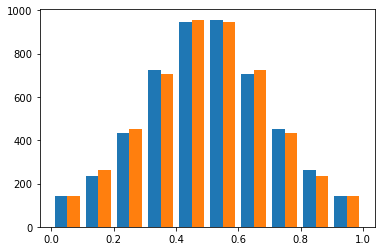

In [1036]:
plt.hist(model.predict_proba(X_test))

In [1029]:
model.coef_

array([[ 1.44560628e-03,  2.69274182e-02,  3.14584513e+00,
        -1.16268470e+00,  1.23772650e-02,  6.23471498e-03,
         1.35720321e-02, -2.89523156e-03, -1.83011237e-01,
        -4.23844542e-03,  2.39426752e-01, -7.72004604e-04,
         0.00000000e+00, -1.45935089e-03,  2.85014248e-02,
         0.00000000e+00,  5.91178810e-04, -1.21416575e-01,
        -1.27781270e-02, -1.87140430e-01, -1.65036092e-02,
         9.12303967e-01,  0.00000000e+00,  0.00000000e+00,
         9.73440103e-03, -4.48726495e-01,  1.35639451e-02,
         8.32039878e-01,  7.82365379e-03,  1.69177099e-01,
        -1.66096445e-03, -1.75643938e-01, -4.73366393e-04,
         0.00000000e+00, -1.56769298e-03, -1.63219367e-03,
         4.78945939e-01,  1.50249888e-03, -4.16952257e-02,
         5.08653597e-02, -4.86274712e-01, -1.79883449e-03,
         7.49832091e-05, -7.88084650e-01, -1.66761567e-03,
         1.59163363e-02, -1.93706844e-03,  6.11063933e-01,
        -2.63440803e-03,  2.27977154e-01,  1.76427127e-0

In [1074]:
total = 0
correct = 0
corr_bet = 0
pred_vector = model.predict(X_test)
target_vector = y_test
for i in range(len(target_vector)):
    if (to_predict_test[i] == 1):
        total = total+1
        if (pred_vector[i] == target_vector[i]):
            correct = correct+1
            
bet_365_prediction = np.zeros(len(target_vector))
start_index = num_matches-len(target_vector)
for i in range(len(target_vector)):
    # Player 1 is the winner
    if (to_predict_test[i] == 1):
        if (y_test[i] == 1):
            player_1_chances = 1/all_data.at[i+start_index,"B365W"]
            player_2_chances = 1/all_data.at[i+start_index,"B365L"]
            if (player_1_chances > player_2_chances):
                bet_365_prediction[i] = 1
            else:
                bet_365_prediction[i] = 0
            if (bet_365_prediction[i] == target_vector[i]):
                corr_bet += 1

        # Player 2 is the winner
        else:
            player_1_chances = 1/all_data.at[i+start_index,"B365L"]
            player_2_chances = 1/all_data.at[i+start_index,"B365W"]
            if (player_1_chances > player_2_chances):
                bet_365_prediction[i] = 1
            else:
                bet_365_prediction[i] = 0
            if (bet_365_prediction[i] == target_vector[i]):
                corr_bet += 1
            
print("My accuracy is: "+ str(correct/total))
print("bet365 accuracy is: " + str(corr_bet/total))
    

My accuracy is: 0.6448598130841121
bet365 accuracy is: 0.6878504672897197


In [2326]:
bet_365_prediction = np.zeros(len(y_test))
for i in range(len(y_test)):
    # Player 1 is the winner
    if (y_test[i] == 1):
        player_1_chances = 1/all_data.at[i+start_index,"B365W"]
        player_2_chances = 1/all_data.at[i+start_index,"B365L"]
        if (player_1_chances > player_2_chances):
            bet_365_prediction[i] = 1
        else:
            bet_365_prediction[i] = 0

    # Player 2 is the winner
    else:
        player_1_chances = 1/all_data.at[i+start_index,"B365L"]
        player_2_chances = 1/all_data.at[i+start_index,"B365W"]
        if (player_1_chances > player_2_chances):
            bet_365_prediction[i] = 1
        else:
            bet_365_prediction[i] = 0
    

In [806]:
len(target_vector)

5823

In [587]:
model.coef_

array([-1.19902792, -2.40993165,  0.        ,  5.93567629, -3.31012863,
        2.04913584, -0.01813948,  0.98537403, -2.20027314,  0.27343516,
        6.39060491, -0.47262267, 12.42865628, -6.94270822, -0.05558069,
        0.52322227,  2.99847739, 12.27098922, -0.57987318])

In [ ]:
len(y_test)

In [ ]:
train_test_split([1,2,3,4,5,6], shuffle=False)

In [695]:
bet_365_prediction = np.zeros(6023)
start_index = num_matches-6023
for i in range(6023):
    # Player 1 is the winner
    if (target[i+start_index] == 1):
        player_1_chances = 1/all_data.at[i+start_index,"B365W"]
        player_2_chances = 1/all_data.at[i+start_index,"B365L"]
        if (player_1_chances > player_2_chances):
            bet_365_prediction[i] = 1
        else:
            bet_365_prediction[i] = 0
            
    # Player 2 is the winner
    else:
        player_1_chances = 1/all_data.at[i+start_index,"B365L"]
        player_2_chances = 1/all_data.at[i+start_index,"B365W"]
        if (player_1_chances > player_2_chances):
            bet_365_prediction[i] = 1
        else:
            bet_365_prediction[i] = 0

In [810]:
ps_prediction = np.zeros(6023)
start_index = num_matches-6023
for i in range(6023):
    # Player 1 is the winner
    if (target[i+start_index] == 1):
        player_1_chances = 1/all_data.at[i+start_index,"PSW"]
        player_2_chances = 1/all_data.at[i+start_index,"PSL"]
        if (player_1_chances > player_2_chances):
            ps_prediction[i] = 1
        else:
            ps_prediction[i] = 0
            
    # Player 2 is the winner
    else:
        player_1_chances = 1/all_data.at[i+start_index,"PSL"]
        player_2_chances = 1/all_data.at[i+start_index,"PSW"]
        if (player_1_chances > player_2_chances):
            ps_prediction[i] = 1
        else:
            ps_prediction[i] = 0

In [586]:
len(bet_365_prediction)

6023

In [696]:
accuracy_score(bet_365_prediction, y_test)

0.6777353478333057

In [698]:
accuracy_score(ps_prediction, y_test)

0.6800597708782998

In [ ]:
bet_365_prediction

In [ ]:
len(y_test)

In [738]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [739]:
clf.fit(X_train,y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 0.7131708936947407
Test score is: 0.6397144280259007


In [737]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
print("Training score is: " + str(accuracy_score(y_train,clf.predict(X_train))))
print("Test score is: " + str(accuracy_score(y_test,clf.predict(X_test))))

Training score is: 0.999916981445353
Test score is: 0.6377220654159057
